In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
import math

In [4]:
train = pd.read_csv("./Data/train_df_errno.csv")
test = pd.read_csv("./Data/test_df.csv")
sub = pd.read_csv("./Data/sample_submission.csv")
age = pd.read_csv("./Data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2896, 23), (1008, 21), (150, 2), (16, 23))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2896 non-null   object 
 1   총세대수        2896 non-null   int64  
 2   임대건물구분      2896 non-null   object 
 3   지역          2896 non-null   object 
 4   공급유형        2896 non-null   object 
 5   전용면적        2896 non-null   float64
 6   전용면적별세대수    2896 non-null   int64  
 7   공가수         2896 non-null   float64
 8   자격유형        2896 non-null   object 
 9   임대보증금       2327 non-null   object 
 10  임대료         2327 non-null   object 
 11  10분내지하철수    2685 non-null   float64
 12  10분내버스정류장수  2896 non-null   float64
 13  단지내주차면수     2896 non-null   float64
 14  단지코드_Type   2896 non-null   float64
 15  임대건물구분_lbl  2896 non-null   int64  
 16  지역_lbl      2896 non-null   int64  
 17  공급유형_lbl    2896 non-null   int64  
 18  자격유형_lbl    2896 non-null   int64  
 19  단지코드_lbl    2896 non-null  

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        1008 non-null   object 
 1   총세대수        1008 non-null   int64  
 2   임대건물구분      1008 non-null   object 
 3   지역          1008 non-null   object 
 4   공급유형        1008 non-null   object 
 5   전용면적        1008 non-null   float64
 6   전용면적별세대수    1008 non-null   int64  
 7   공가수         1008 non-null   float64
 8   자격유형        1008 non-null   object 
 9   임대보증금       828 non-null    object 
 10  임대료         828 non-null    object 
 11  10분내지하철수    970 non-null    float64
 12  10분내버스정류장수  1008 non-null   float64
 13  단지내주차면수     1008 non-null   float64
 14  단지코드_Type   1008 non-null   float64
 15  임대건물구분_lbl  1008 non-null   int64  
 16  지역_lbl      1008 non-null   int64  
 17  공급유형_lbl    1008 non-null   int64  
 18  자격유형_lbl    1008 non-null   int64  
 19  단지코드_lbl    1008 non-null  

In [7]:
train.columns, test.columns

(Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수',
        '단지코드_Type', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', '단지코드_lbl',
        'qcut_총세대수', '등록차량수', 'log_등록차량수'],
       dtype='object'),
 Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
        '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수',
        '단지코드_Type', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', '단지코드_lbl',
        'qcut_총세대수'],
       dtype='object'))

In [8]:
train.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         569
임대료           569
10분내지하철수      211
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
등록차량수           0
log_등록차량수       0
dtype: int64

In [9]:
test.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         180
임대료           180
10분내지하철수       38
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2896.0,891.025207,516.665211,26.000000,514.000000,780.000000,1106.000000,2568.000000
전용면적,2896.0,44.559033,32.000640,12.620000,32.100000,39.905000,51.292500,583.400000
전용면적별세대수,2896.0,102.822514,132.988590,1.000000,14.750000,60.000000,143.250000,1865.000000
공가수,2896.0,12.877417,10.653686,0.000000,4.000000,11.000000,20.000000,55.000000
10분내지하철수,2685.0,0.180261,0.431074,0.000000,0.000000,0.000000,0.000000,3.000000
10분내버스정류장수,2896.0,3.703706,2.665053,0.000000,2.000000,3.000000,4.000000,20.000000
단지내주차면수,2896.0,598.766575,396.677644,13.000000,277.000000,507.000000,823.000000,1798.000000
단지코드_Type,2896.0,2.871892,0.471455,1.000000,3.000000,3.000000,3.000000,3.000000
임대건물구분_lbl,2896.0,1.194061,0.395544,1.000000,1.000000,1.000000,1.000000,2.000000
지역_lbl,2896.0,6.072169,4.207811,1.000000,3.000000,5.000000,9.000000,16.000000


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,1008.0,869.378968,535.908018,75.00,492.50,754.00,1161.00,2572.0
전용면적,1008.0,43.788462,36.105647,9.96,33.15,39.72,47.41,583.4
전용면적별세대수,1008.0,101.093254,126.674450,1.00,14.00,60.00,140.00,1341.0
공가수,1008.0,15.630952,11.116013,0.00,6.00,16.00,23.00,45.0
10분내지하철수,970.0,0.138144,0.437519,0.00,0.00,0.00,0.00,2.0
10분내버스정류장수,1008.0,4.597222,5.391566,1.00,2.00,3.00,5.00,50.0
단지내주차면수,1008.0,546.678571,341.278739,29.00,286.00,458.00,706.50,1696.0
단지코드_Type,1008.0,2.704365,0.707388,1.00,3.00,3.00,3.00,3.0
임대건물구분_lbl,1008.0,1.175595,0.380664,1.00,1.00,1.00,1.00,2.0
지역_lbl,1008.0,6.375000,4.082594,1.00,3.00,5.00,10.00,16.0


In [12]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,624.0,3.0,1,1,1,1,492,1,205.0,5.327876


In [13]:
def check_train_test_column_values(train, test, column):
    # 두 데이터 테이블과 특정 컬럼을 집어 넣으면 value를 비교하여 출력하는 함수
    print('{} column에 대한 train_test_values_check 입니다 ======='.format(column))
    # train/test set의 입력 컬럼의 value를 set으로 받습니다.
    train_colset = set(train[column])
    test_colset = set(test[column])
    
    # train/test set 고유한 value의 개수를 구함
    print(f'train set에 있는 고유한 value 개수 : {len(train_colset)}')
    print(f'test set에 있는 고유한 value 개수 : {len(test_colset)}')
    
    # train/test set 모두에 포함되어 있는 value를 구함
    print('='*20)
    common_colset = train_colset.intersection(test_colset)
    print(f'train/test set에 공통으로 포함되어 있는 value 개수 : {len(common_colset)}')
    if len(common_colset) > 200: # value가 너무 많으면 어차피 보기 힘드므로 출력 pass
        pass
    else:
        try: # int나 float은 sorted가 먹지 않으므로 try-except로 넣어줌
            print(f'train/test set에 공통으로 포함되어 있는 value : {sorted(common_colset)}')
        except:
            print(f'train/test set에 공통으로 포함되어 있는 value : {(common_colset)}')
            
    # train set에만 있는 value를 구함
    print('='*20)
    train_only_colset = train_colset.difference(test_colset)
    print(f'train set에만 있는 value는 총 {len(train_only_colset)}개 입니다.')
    if len(train_only_colset) > 200:
        pass
    else:
        try:
            print(f'train set에만 있는 value는 : {sorted(train_only_colset)}')
        except:
            print(f'train set에만 있는 value는 : {(train_only_colset)}')
            
    # test set에만 있는 value를 구함
    print('='*20)
    test_only_colset = test_colset.difference(train_colset)
    print(f'test set에만 있는 value는 총 {len(test_only_colset)}개 입니다.')
    if len(test_only_colset) > 200:
        pass
    else:
        try:
            print(f'test set에만 있는 value는 : {sorted(test_only_colset)}')
        except:
            print(f'test set에만 있는 value는 : {(test_only_colset)}')
    print(' ')

In [14]:
object_cols = []
for col in train.columns:
    if train[col].dtypes == 'object':
        object_cols.append(col)

In [15]:
for col in object_cols:
    check_train_test_column_values(train, test, col)

단지코드 column에 대한 train_test_values_check 입니다 =======
train set에 있는 고유한 value 개수 : 414
test set에 있는 고유한 value 개수 : 147
train/test set에 공통으로 포함되어 있는 value 개수 : 0
train/test set에 공통으로 포함되어 있는 value : []
train set에만 있는 value는 총 414개 입니다.
test set에만 있는 value는 총 147개 입니다.
test set에만 있는 value는 : ['C1003', 'C1006', 'C1016', 'C1019', 'C1030', 'C1038', 'C1040', 'C1060', 'C1064', 'C1071', 'C1072', 'C1083', 'C1105', 'C1128', 'C1135', 'C1147', 'C1149', 'C1152', 'C1158', 'C1166', 'C1189', 'C1215', 'C1216', 'C1225', 'C1229', 'C1239', 'C1250', 'C1253', 'C1266', 'C1267', 'C1282', 'C1289', 'C1294', 'C1297', 'C1311', 'C1318', 'C1323', 'C1332', 'C1349', 'C1377', 'C1392', 'C1414', 'C1416', 'C1456', 'C1457', 'C1472', 'C1474', 'C1494', 'C1495', 'C1496', 'C1521', 'C1525', 'C1563', 'C1564', 'C1570', 'C1593', 'C1602', 'C1603', 'C1604', 'C1617', 'C1621', 'C1623', 'C1629', 'C1633', 'C1637', 'C1640', 'C1683', 'C1692', 'C1708', 'C1712', 'C1721', 'C1729', 'C1741', 'C1749', 'C1772', 'C1782', 'C1794', 'C1812', 'C1826',

In [16]:
pd.options.display.max_columns = 30

In [17]:
train_apart = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[train['임대건물구분'] == '아파트']

In [18]:
train_shop = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형']].loc[train['임대건물구분'] == '상가']

In [19]:
train_block = train[['단지코드', '총세대수', '지역', '공가수', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']].drop_duplicates()

In [20]:
train_apart.shape, train_shop.shape, train_block.shape

((2334, 8), (562, 6), (416, 8))

In [21]:
train_apart.head()

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,자격유형,임대보증금,임대료
0,C2515,아파트,국민임대,33.48,276,A,9216000,82940
1,C2515,아파트,국민임대,39.60,60,A,12672000,107130
2,C2515,아파트,국민임대,39.60,20,A,12672000,107130
3,C2515,아파트,국민임대,46.90,38,A,18433000,149760
4,C2515,아파트,국민임대,46.90,19,A,18433000,149760


In [22]:
train_shop.head()

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,자격유형
80,C1925,상가,임대상가,32.10,1,D
81,C1925,상가,임대상가,32.10,1,D
82,C1925,상가,임대상가,32.10,1,D
83,C1925,상가,임대상가,72.16,1,D
93,C1874,상가,임대상가,12.62,1,D


In [23]:
train_block.head()

,단지코드,총세대수,지역,공가수,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수
0,C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0
7,C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0
18,C1945,755,경기도,6.0,1.0,3.0,734.0,730.0
24,C1470,696,전라북도,14.0,0.0,2.0,645.0,553.0
28,C1898,566,전라북도,9.0,0.0,6.0,517.0,415.0


In [24]:
test_apart = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[test['임대건물구분'] == '아파트']

In [25]:
test_shop = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형']].loc[test['임대건물구분'] == '상가']

In [26]:
test_block = test[['단지코드', '총세대수', '지역', '공가수', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']].drop_duplicates()

In [27]:
test_apart.shape, test_shop.shape, test_block.shape

((831, 8), (177, 6), (147, 7))

In [28]:
test_apart.head()

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,자격유형,임대보증금,임대료
0,C1072,아파트,국민임대,39.79,116,H,22830000,189840
1,C1072,아파트,국민임대,46.81,30,A,36048000,249930
2,C1072,아파트,국민임대,46.90,112,H,36048000,249930
3,C1072,아파트,국민임대,46.90,120,H,36048000,249930
4,C1072,아파트,국민임대,51.46,60,H,43497000,296780


In [29]:
test_shop.head()

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,자격유형
80,C1006,상가,임대상가,38.00,1,D
81,C1006,상가,임대상가,38.00,1,D
82,C1006,상가,임대상가,37.26,1,D
83,C1006,상가,임대상가,37.41,1,D
84,C1006,상가,임대상가,37.41,1,D


In [30]:
test_block.head()

,단지코드,총세대수,지역,공가수,10분내지하철수,10분내버스정류장수,단지내주차면수
0,C1072,754,경기도,14.0,0.0,2.0,683.0
8,C1128,1354,경기도,9.0,0.0,3.0,1216.0
17,C1456,619,부산광역시,18.0,0.0,16.0,547.0
26,C1840,593,전라북도,7.0,0.0,3.0,543.0
30,C1332,1297,경기도,11.0,0.0,2.0,1112.0


test set의 단지는 총 150개. 이중 50/100 개로 나뉘어 평가

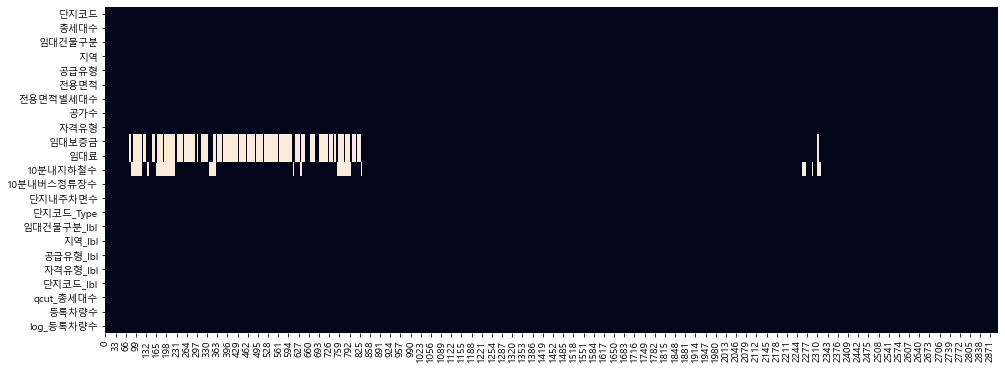

In [31]:
plt.figure(figsize=(16, 6))
sns.heatmap(train.isnull().T, cbar=False)
plt.show()

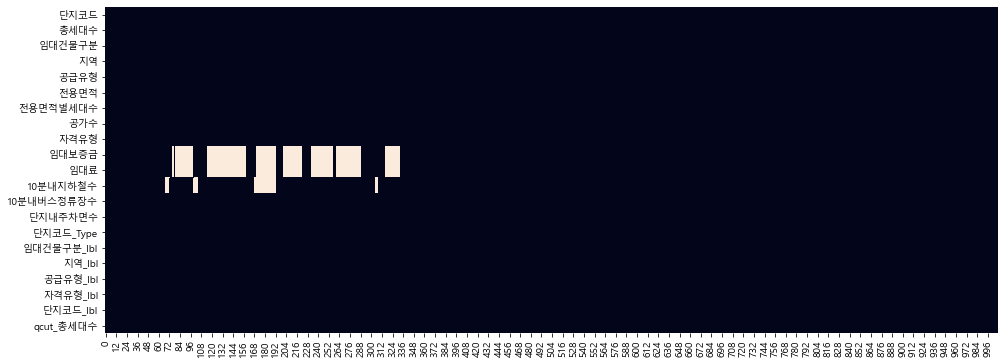

In [32]:
plt.figure(figsize=(16, 6))
sns.heatmap(test.isnull().T, cbar=False)
plt.show()

In [33]:
print('전체 단지 수:', train['단지코드'].nunique())
print('지하철 결측치 단지 수:', train.loc[train['10분내지하철수'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지:', train.loc[train['10분내지하철수'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역:', train.loc[train['10분내지하철수'].isnull()]['지역'].unique())

전체 단지 수: 414
지하철 결측치 단지 수: 20
지하철 결측치 단지: ['C1312' 'C1874' 'C1424' 'C2100' 'C2520' 'C1616' 'C1704' 'C2258' 'C1068'
 'C1983' 'C2216' 'C2644' 'C1005' 'C1004' 'C1875' 'C2156' 'C1175' 'C2583'
 'N2431' 'C1350']
지하철 결측치 단지 지역: ['충청남도' '대전광역시' '경상남도']


In [34]:
print('전체 단지 수:', test['단지코드'].nunique())
print('지하철 결측치 단지 수:', test.loc[test['10분내지하철수'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지:', test.loc[test['10분내지하철수'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역:', test.loc[test['10분내지하철수'].isnull()]['지역'].unique())

전체 단지 수: 147
지하철 결측치 단지 수: 4
지하철 결측치 단지: ['C1472' 'C1083' 'C2177' 'C1318']
지하철 결측치 단지 지역: ['충청남도' '대전광역시']


In [35]:
train[train['임대건물구분']=='아파트']['자격유형'].unique()

array(['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'D', 'J', 'K', 'L', 'M',
       'N', 'O'], dtype=object)

In [36]:
train[train['임대건물구분']=='상가']['자격유형'].unique()

array(['D'], dtype=object)

In [37]:
test[test['임대건물구분']=='아파트']['자격유형'].unique()

array(['H', 'A', 'E', 'C', 'D', 'G', 'I', 'J', 'K', 'L', 'M', 'N'],
      dtype=object)

In [38]:
test[test['임대건물구분']=='상가']['자격유형'].unique()

array(['D'], dtype=object)

In [39]:
train.loc[(train['임대건물구분']=='아파트')&(train['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
2309,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2310,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2315,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597


In [40]:
train.loc[(train['임대건물구분']=='상가')&(train['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1,62.0,4.143135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
827,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
828,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
829,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,3.0,2,1,4,4,518,1,62.0,4.143135


In [41]:
train.loc[(train['임대건물구분']=='아파트')&(train['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
2309,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2310,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597
2315,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,3.0,1,2,8,4,117,4,2315.0,7.747597


In [42]:
train.loc[(train['임대건물구분']=='상가')&(train['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,등록차량수,log_등록차량수
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,1.0,2,5,4,4,294,1,75.0,4.330733
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1,62.0,4.143135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
827,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
828,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,3.0,2,1,4,4,518,1,62.0,4.143135
829,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,3.0,2,1,4,4,518,1,62.0,4.143135


In [43]:
test.loc[(test['임대건물구분']=='아파트')&(test['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,1,2,3,4,4,4
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,1,2,3,4,4,4
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,1,2,3,4,4,4


In [44]:
test.loc[(test['임대건물구분']=='상가')&(test['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
82,C1006,1505,상가,대전광역시,임대상가,37.26,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
83,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
84,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1


In [45]:
test.loc[(test['임대건물구분']=='아파트')&(test['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,1,2,3,4,4,4
77,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,1,2,3,4,4,4
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,1,2,3,4,4,4


In [46]:
test.loc[(test['임대건물구분']=='상가')&(test['임대료'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
80,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
81,C1006,1505,상가,대전광역시,임대상가,38.00,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
82,C1006,1505,상가,대전광역시,임대상가,37.26,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
83,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
84,C1006,1505,상가,대전광역시,임대상가,37.41,1,27.0,D,NaN,NaN,2.0,5.0,428.0,3.0,2,2,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0,3.0,2,5,4,4,228,1


In [47]:
train[(train['임대건물구분']=='아파트')&(train['임대보증금'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [48]:
train[(train['임대건물구분']=='상가')&(train['임대보증금'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [49]:
train[(train['임대건물구분']=='아파트')&(train['임대료'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [50]:
train[(train['임대건물구분']=='상가')&(train['임대료'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [51]:
test[(test['임대건물구분']=='아파트')&(test['임대보증금'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [52]:
test[(test['임대건물구분']=='상가')&(test['임대보증금'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [53]:
test[(test['임대건물구분']=='아파트')&(test['임대료'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [54]:
test[(test['임대건물구분']=='상가')&(test['임대료'].isnull())]['자격유형'].unique()

array(['D'], dtype=object)

In [55]:
print('전체 단지 수:', train['단지코드'].nunique())
print('상가 보유 단지 수:', train.loc[train['임대건물구분']=='상가']['단지코드'].nunique())
print('상가 보유 단지:', train.loc[train['임대건물구분']=='상가']['단지코드'].unique())
print('상가 보유 단지 지역:', train.loc[train['임대건물구분']=='상가']['지역'].unique())

전체 단지 수: 414
상가 보유 단지 수: 33
상가 보유 단지: ['C1925' 'C1874' 'C2416' 'C2621' 'C1616' 'C1704' 'C2258' 'C2038' 'C1859'
 'C1722' 'C2190' 'C1476' 'C1983' 'C2135' 'C2034' 'C1109' 'C2289' 'C2597'
 'C2310' 'C2132' 'C1439' 'C1899' 'C1056' 'C2644' 'C1206' 'C1775' 'C1790'
 'C2109' 'C1698' 'C1004' 'C1875' 'C2212' 'C2571']
상가 보유 단지 지역: ['강원도' '충청남도' '경상남도' '대전광역시' '부산광역시' '제주특별자치도']


In [56]:
print('전체 단지 수:', test['단지코드'].nunique())
print('상가 보유 단지 수:', test.loc[test['임대건물구분']=='상가']['단지코드'].nunique())
print('상가 보유 단지:', test.loc[test['임대건물구분']=='상가']['단지코드'].unique())
print('상가 보유 단지 지역:', test.loc[test['임대건물구분']=='상가']['지역'].unique())

전체 단지 수: 147
상가 보유 단지 수: 7
상가 보유 단지: ['C1006' 'C2676' 'C2177' 'C2033' 'C1812' 'C2253' 'C1729']
상가 보유 단지 지역: ['대전광역시' '부산광역시' '충청남도' '울산광역시' '강원도']


(array([ 12.,   6.,  85., 180., 352., 314., 649., 781., 399., 118.]),
 array([2.56494936, 3.09283929, 3.62072921, 4.14861914, 4.67650907,
        5.204399  , 5.73228893, 6.26017885, 6.78806878, 7.31595871,
        7.84384864]),
 <BarContainer object of 10 artists>)

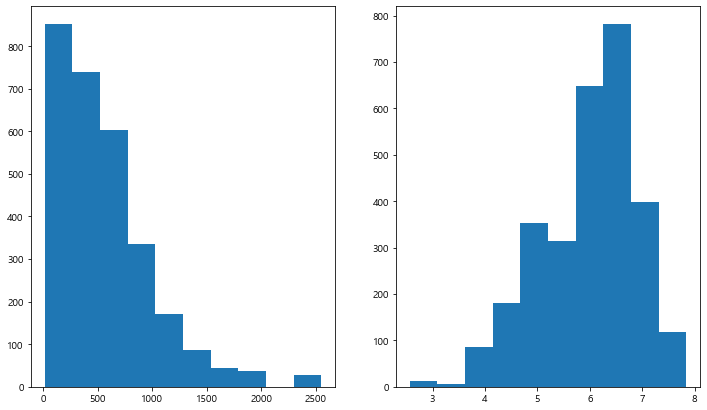

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax1.hist(train['등록차량수'])
ax2.hist(np.log(train['등록차량수']))

In [58]:
numeric_cols = []
for col in train.columns:
    if train[col].dtypes != 'object':
        numeric_cols.append(col)

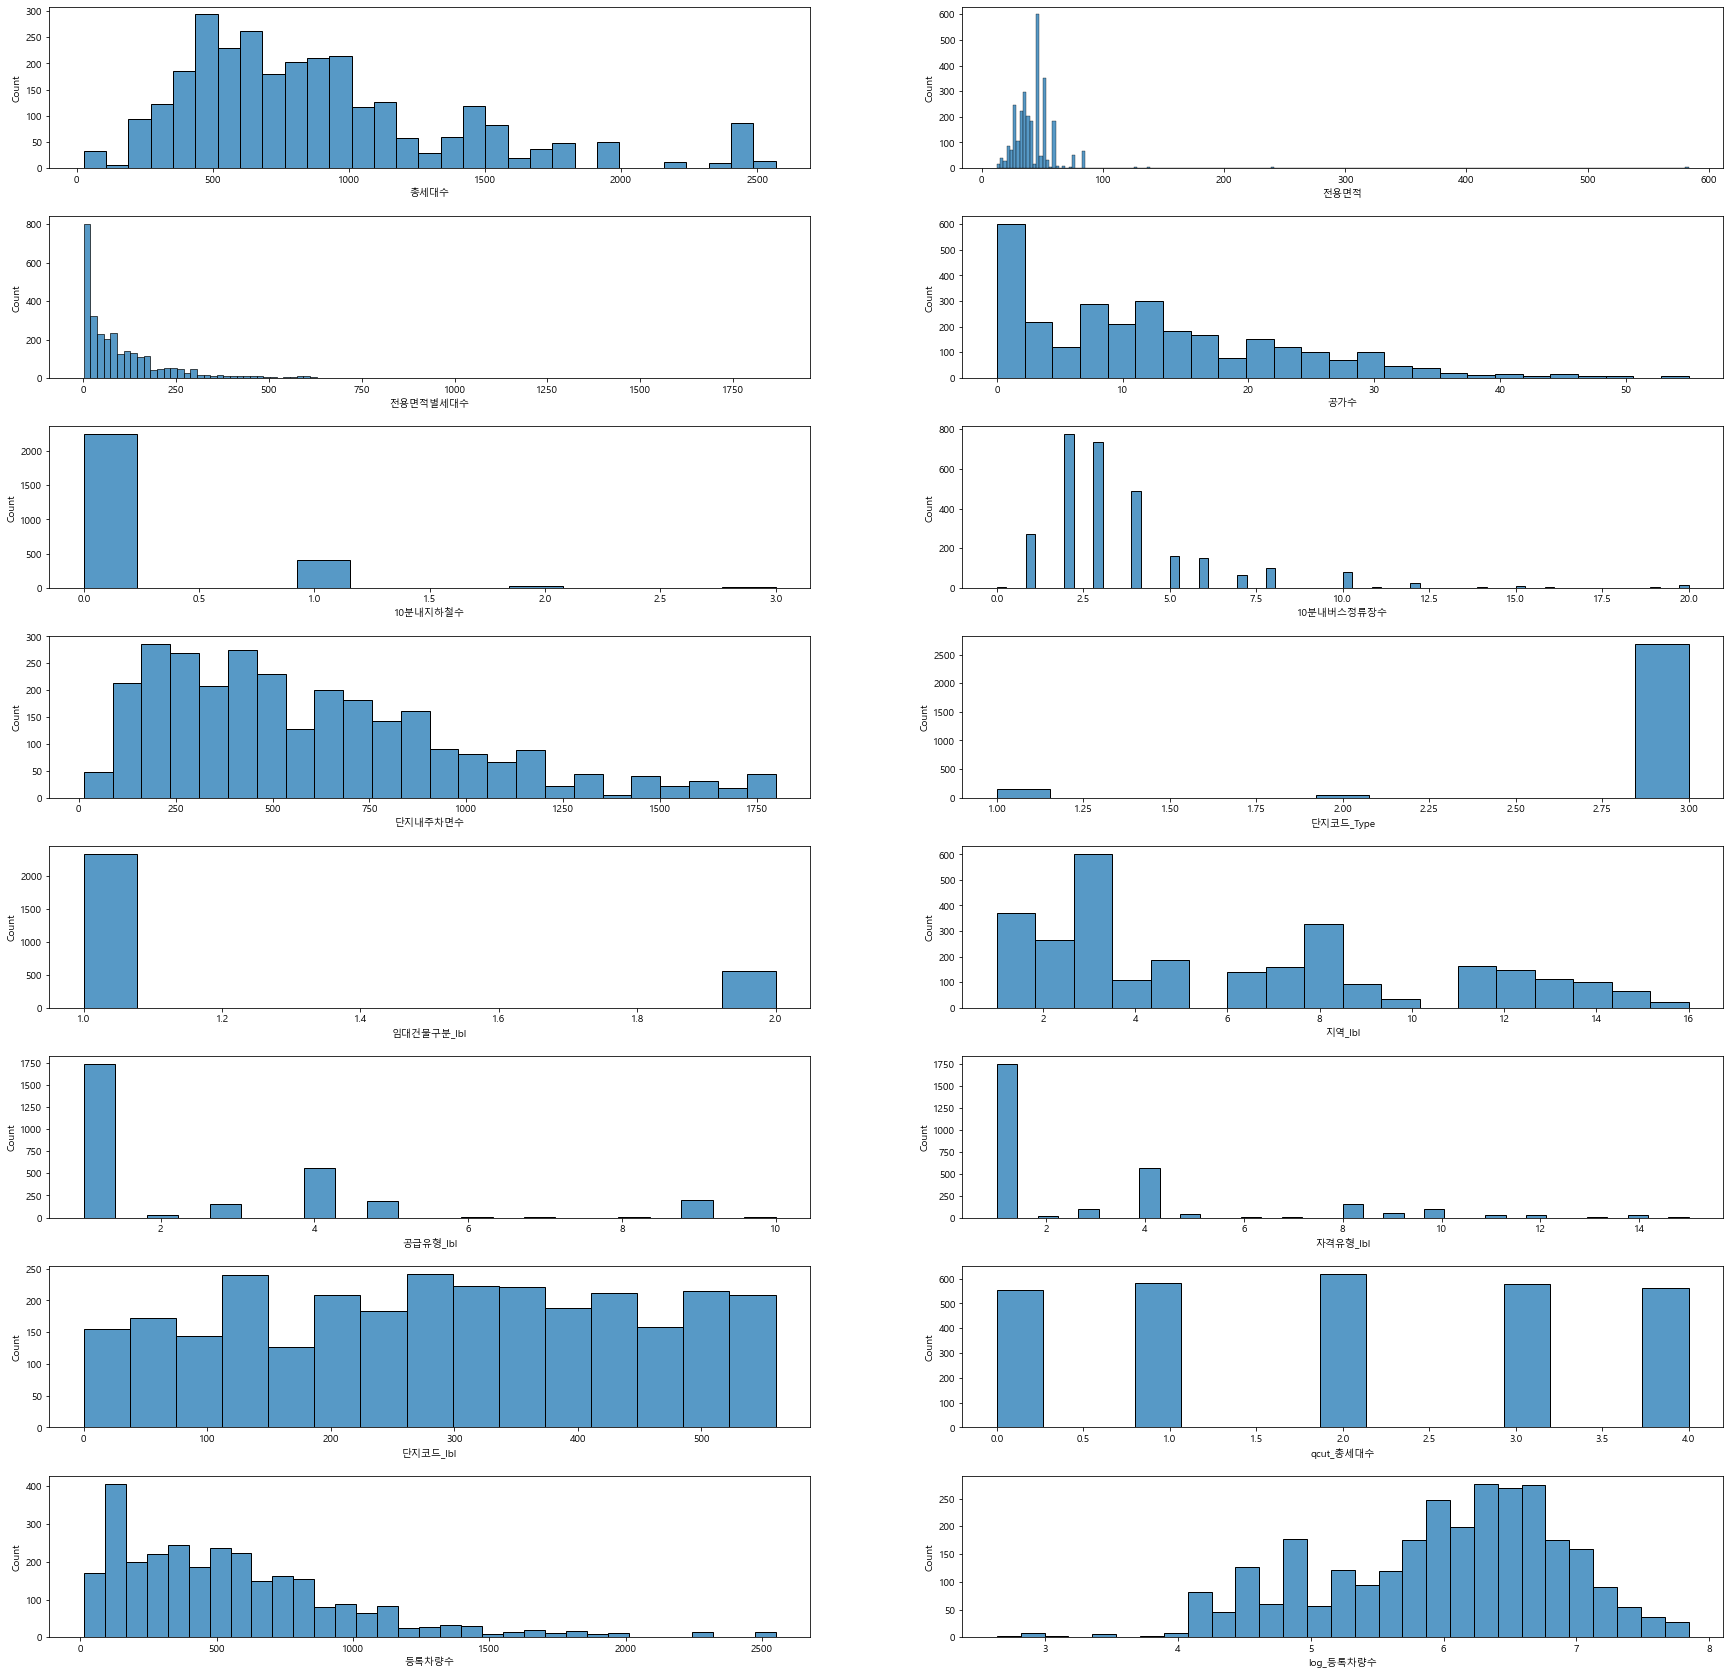

In [59]:
fig = plt.figure(figsize=(30,30))
for i, n in enumerate(numeric_cols):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(train[n])

In [60]:
numeric_cols_test = []
for col in test.columns:
    if test[col].dtypes != 'object':
        numeric_cols_test.append(col)

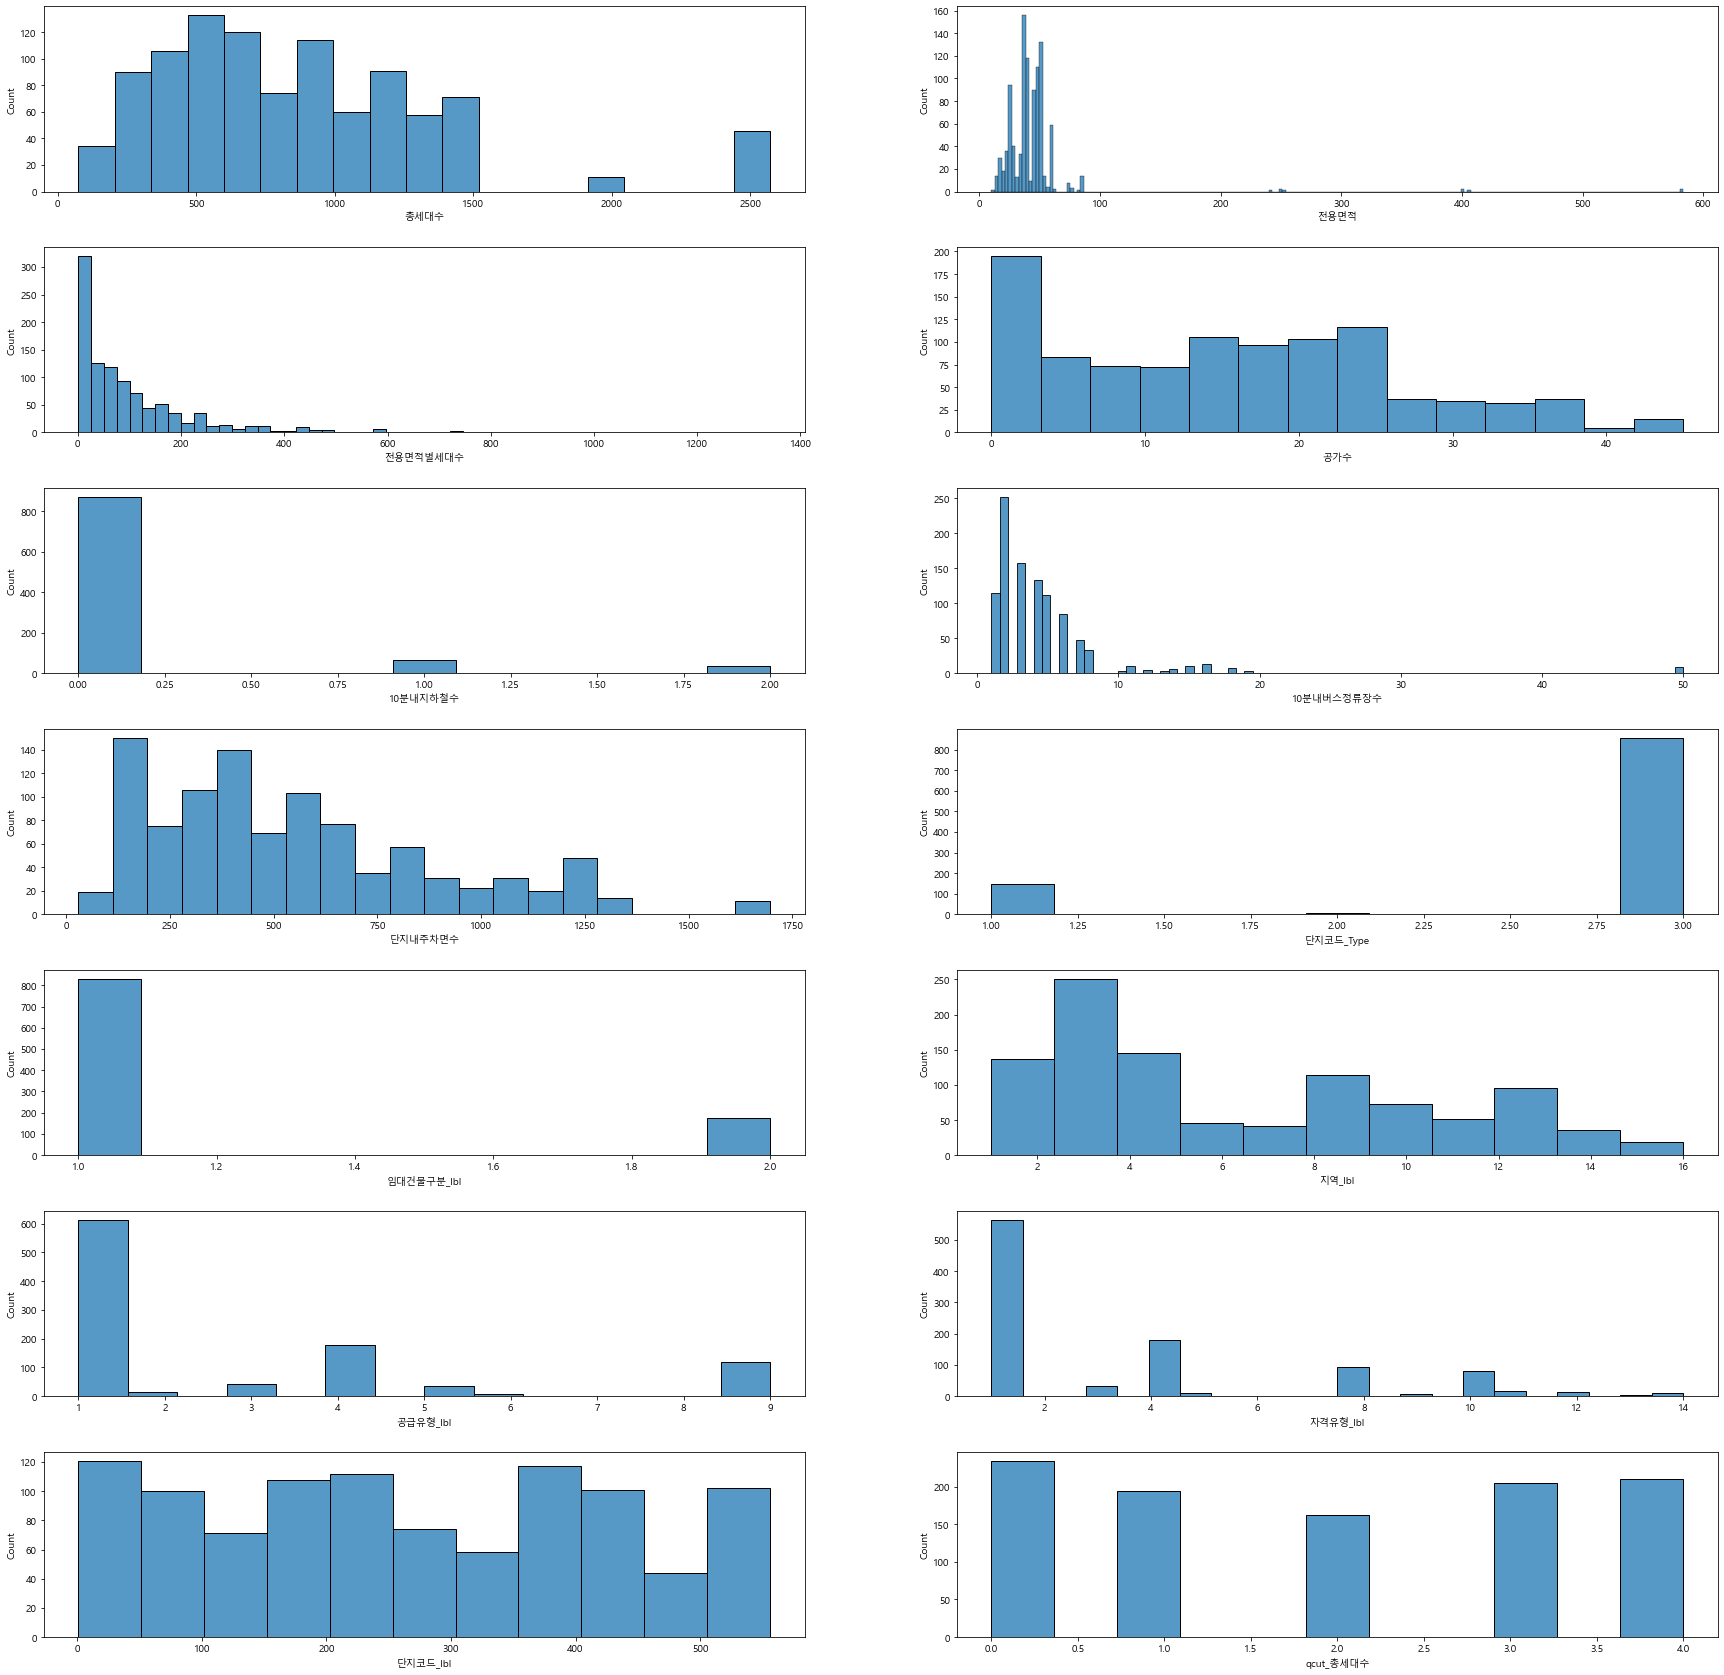

In [61]:
fig = plt.figure(figsize=(30,30))
for i, n in enumerate(numeric_cols_test):
    plt.subplot(7, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(test[n])

In [62]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지역         16 non-null     object 
 1   10대미만(여자)  16 non-null     float64
 2   10대미만(남자)  16 non-null     float64
 3   10대(여자)    16 non-null     float64
 4   10대(남자)    16 non-null     float64
 5   20대(여자)    16 non-null     float64
 6   20대(남자)    16 non-null     float64
 7   30대(여자)    16 non-null     float64
 8   30대(남자)    16 non-null     float64
 9   40대(여자)    16 non-null     float64
 10  40대(남자)    16 non-null     float64
 11  50대(여자)    16 non-null     float64
 12  50대(남자)    16 non-null     float64
 13  60대(여자)    16 non-null     float64
 14  60대(남자)    16 non-null     float64
 15  70대(여자)    16 non-null     float64
 16  70대(남자)    16 non-null     float64
 17  80대(여자)    16 non-null     float64
 18  80대(남자)    16 non-null     float64
 19  90대(여자)    16 non-null     float64
 20  90대(남자)    1

In [63]:
age.describe()

,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.029229,0.030512,0.050039,0.052110,0.063256,0.066395,0.061250,0.060140,0.075738,0.070582,0.082561,0.069560,0.084382,0.065974,0.051411,0.035639,0.030447,0.012664,0.006226,0.001548,0.000263,0.000075
std,0.005938,0.006121,0.010954,0.011193,0.006266,0.005236,0.014111,0.014301,0.007822,0.005248,0.006002,0.004935,0.014841,0.008851,0.016191,0.009233,0.008320,0.003954,0.001818,0.000603,0.000105,0.000114
min,0.015323,0.015627,0.025210,0.026121,0.052712,0.056782,0.047049,0.046596,0.054216,0.060769,0.067065,0.056631,0.065279,0.051163,0.026056,0.026223,0.013893,0.007086,0.003459,0.000895,0.000084,0.000000
25%,0.026548,0.026676,0.047510,0.048234,0.060305,0.063974,0.052629,0.051301,0.075033,0.067843,0.079751,0.067642,0.074245,0.059294,0.042506,0.030571,0.026762,0.011133,0.005380,0.001086,0.000209,0.000013
50%,0.029523,0.031196,0.053214,0.054779,0.063399,0.067367,0.058899,0.055473,0.077725,0.070602,0.082823,0.069049,0.079660,0.065965,0.048150,0.032907,0.028562,0.011622,0.005772,0.001504,0.000262,0.000032
75%,0.032665,0.034820,0.059096,0.061413,0.065703,0.070326,0.065544,0.066962,0.080158,0.073796,0.086942,0.072442,0.089979,0.070076,0.051497,0.036715,0.032720,0.012737,0.006930,0.001715,0.000303,0.000089
max,0.038030,0.039507,0.060094,0.063379,0.079284,0.074689,0.106121,0.104447,0.083660,0.079183,0.092891,0.077795,0.119639,0.085294,0.097543,0.061050,0.047908,0.023463,0.011344,0.003326,0.000532,0.000464


In [64]:
age

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,0.079902,0.067443,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,0.079299,0.069167,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,0.072530,0.088403,0.068930,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082


In [65]:
age_region = age.set_index('지역')
age_region.T

지역,경상북도,경상남도,대전광역시,경기도,전라북도,강원도,광주광역시,충청남도,부산광역시,제주특별자치도,울산광역시,충청북도,전라남도,대구광역시,서울특별시,세종특별자치시
10대미만(여자),0.030158,0.027400,0.028197,0.038030,0.028089,0.028888,0.031994,0.031369,0.022003,0.034690,0.023991,0.034678,0.031930,0.023765,0.015323,0.037159
10대미만(남자),0.033195,0.026902,0.029092,0.039507,0.029065,0.030682,0.034566,0.031711,0.022947,0.036695,0.025997,0.035339,0.034647,0.025626,0.015627,0.036601
10대(여자),0.056346,0.053257,0.040490,0.052546,0.059685,0.051287,0.049851,0.059077,0.032681,0.060094,0.053874,0.059808,0.059154,0.034098,0.025210,0.053172
10대(남자),0.061360,0.055568,0.042793,0.053990,0.060080,0.052712,0.050254,0.062422,0.035512,0.063080,0.056967,0.061570,0.063379,0.037897,0.026121,0.050047
20대(여자),0.060096,0.064920,0.060834,0.058484,0.066262,0.060374,0.065084,0.067975,0.053796,0.069135,0.064240,0.060824,0.065517,0.062559,0.052712,0.079284
20대(남자),0.067859,0.070618,0.064247,0.059894,0.070322,0.063157,0.066875,0.072622,0.057233,0.069667,0.074689,0.064937,0.070339,0.068251,0.056782,0.064833
30대(여자),0.053433,0.056414,0.068654,0.072331,0.052027,0.059821,0.066888,0.065095,0.047049,0.050808,0.052830,0.061069,0.057977,0.061825,0.047655,0.106121
30대(남자),0.049572,0.057550,0.066848,0.068704,0.046596,0.054321,0.064416,0.067303,0.048866,0.048026,0.052412,0.056625,0.053471,0.071207,0.051877,0.104447
40대(여자),0.083660,0.077092,0.074667,0.083208,0.077005,0.076201,0.080028,0.078860,0.061952,0.080548,0.078450,0.082318,0.078358,0.070090,0.054216,0.075155
40대(남자),0.072613,0.067600,0.067925,0.078355,0.066645,0.068002,0.079183,0.073418,0.060769,0.072530,0.062317,0.072648,0.075724,0.067977,0.068673,0.074932


In [66]:
age_region.loc['전체 평균'] = age_region.mean()
age_region.loc['광역시 평균'] = age_region.loc[age_region.index.str.contains('시')].mean()
age_region.loc['도 평균'] = age_region.loc[age_region.index.str.contains('도')].mean()

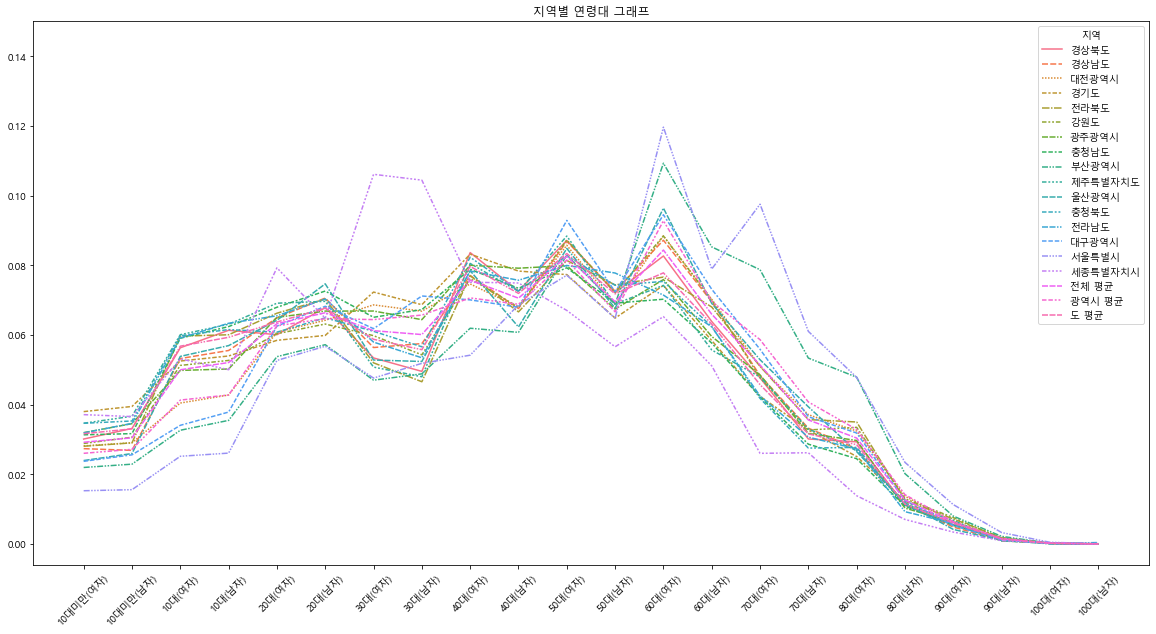

In [67]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=age_region.T)
plt.title('지역별 연령대 그래프')
plt.xticks(rotation=45)
plt.ylim(top=0.15)
plt.show()

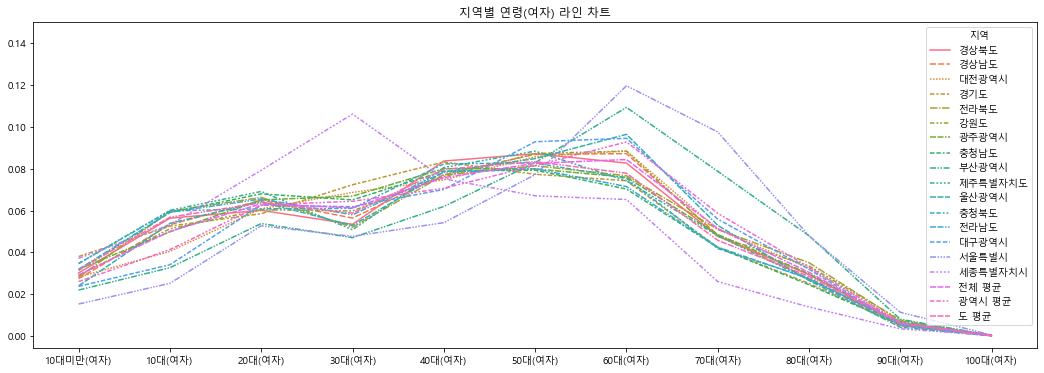

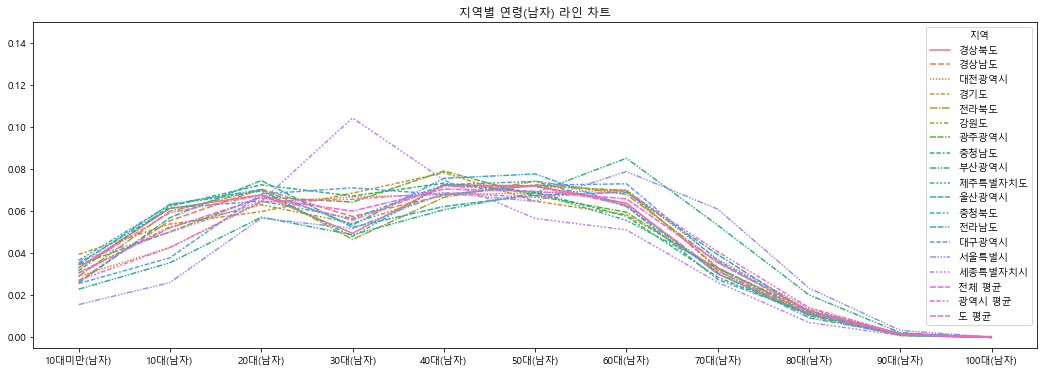

In [68]:
fig = plt.figure(figsize=(18,6))
sns.lineplot(data=age_region.loc[:,age_region.columns.str.contains('여자')].T)
plt.title('지역별 연령(여자) 라인 차트')
plt.ylim(top=0.15)
plt.show()

fig = plt.figure(figsize=(18,6))
sns.lineplot(data=age_region.loc[:,age_region.columns.str.contains('남자')].T)
plt.title('지역별 연령(남자) 라인 차트')
plt.ylim(top=0.15)
plt.show()

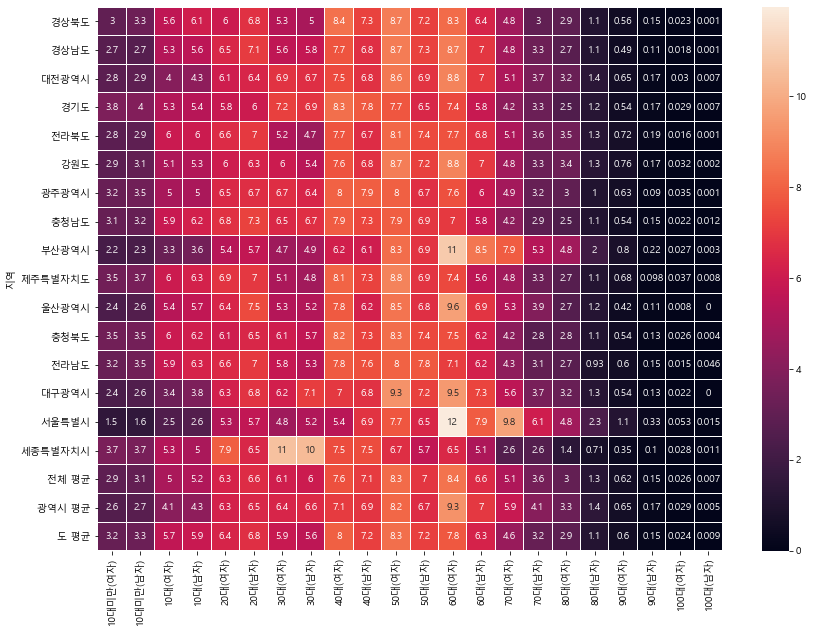

In [69]:
plt.figure(figsize=(14,10))
sns.heatmap((age_region*100).round(3), annot=True, linewidths=0.01)
plt.show()

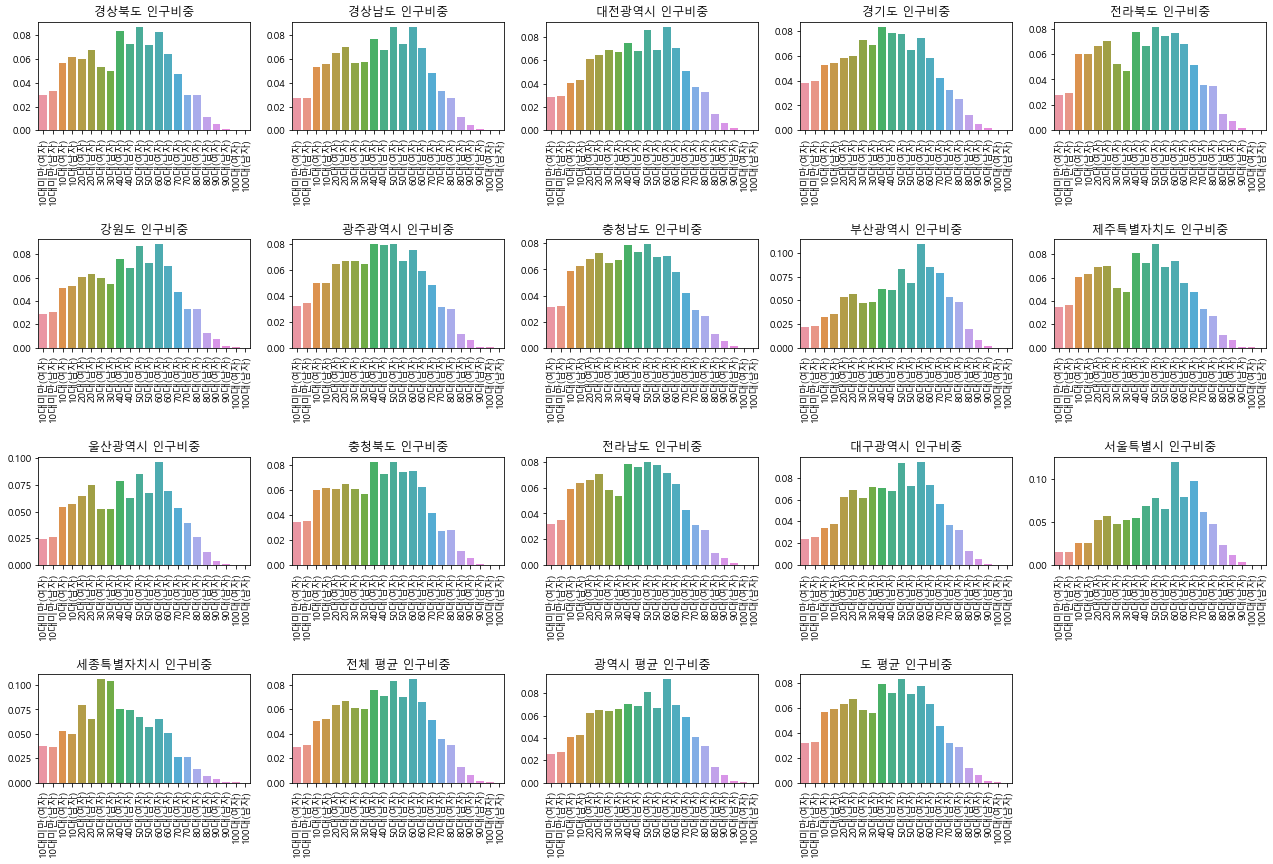

In [70]:
fig = plt.figure(figsize=(22,18))
plt.xticks(rotation=90)
for i, n in enumerate(list(age_region.index)):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=1.0)
    plt.title('{} 인구비중'.format(n))
    sns.barplot(data=age_region.loc[age_region.index==n])
    plt.xticks(rotation=90)

In [71]:
all_df = pd.concat([train, test], join='inner', ignore_index=True)
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,3.0,1,1,1,1,492,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0,1.0,1,1,9,12,86,2
3900,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0,1.0,1,4,1,8,381,0
3901,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0,1.0,1,4,1,8,381,0
3902,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0,1.0,1,4,1,8,381,0


In [72]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      249
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

In [73]:
all_df['qcut_총세대수'].unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [74]:
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

In [75]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3904 non-null   object 
 1   총세대수        3904 non-null   int64  
 2   임대건물구분      3904 non-null   object 
 3   지역          3904 non-null   object 
 4   공급유형        3904 non-null   object 
 5   전용면적        3904 non-null   float64
 6   전용면적별세대수    3904 non-null   int64  
 7   공가수         3904 non-null   float64
 8   자격유형        3904 non-null   object 
 9   임대보증금       3155 non-null   object 
 10  임대료         3155 non-null   object 
 11  10분내지하철수    3655 non-null   float64
 12  10분내버스정류장수  3904 non-null   float64
 13  단지내주차면수     3904 non-null   float64
 14  단지코드_Type   3904 non-null   float64
 15  임대건물구분_lbl  3904 non-null   int64  
 16  지역_lbl      3904 non-null   int64  
 17  공급유형_lbl    3904 non-null   int64  
 18  자격유형_lbl    3904 non-null   int64  
 19  단지코드_lbl    3904 non-null  

(array([3.266e+03, 4.760e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03]),
 <BarContainer object of 10 artists>)

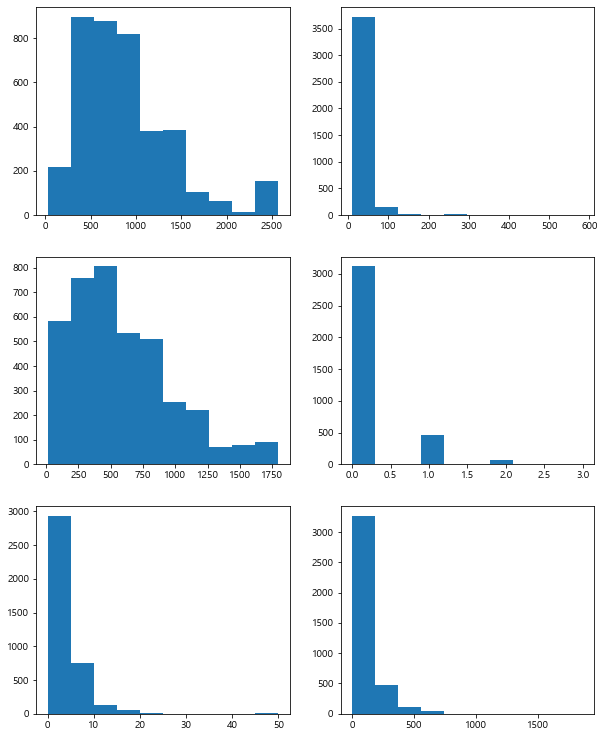

In [76]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['전용면적'])
ax[1][0].hist(all_df['단지내주차면수'])
ax[1][1].hist(all_df['10분내지하철수'])
ax[2][0].hist(all_df['10분내버스정류장수'])
ax[2][1].hist(all_df['전용면적별세대수'])

<AxesSubplot:>

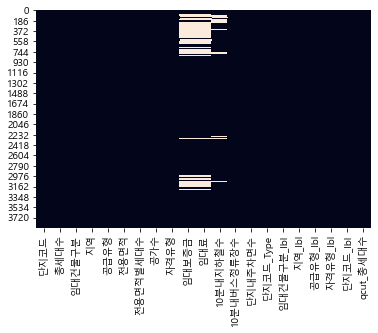

In [77]:
sns.heatmap(all_df.isnull(), cbar=False)

In [78]:
all_df[all_df['공급유형']=='국민임대']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,3.0,1,1,1,1,492,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,C1267,675,아파트,경상남도,국민임대,46.72,112,38.0,H,24420000,219230,0.0,1.0,467.0,1.0,1,1,1,8,86,2
3900,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0,1.0,1,4,1,8,381,0
3901,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0,1.0,1,4,1,8,381,0
3902,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0,1.0,1,4,1,8,381,0


In [79]:
all_df[all_df['지역']=='경상남도']['10분내지하철수'].mean()

0.008888888888888889

#### 10분내지하철수 결측치

In [80]:
pd.set_option('display.max_rows', 800)  # 중간 생략 없이 800개 행을 다 보여준다.

In [81]:
all_df.loc[all_df['10분내지하철수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
86,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.000000,527.0,1.0,1,7,1,1,101,1
87,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.000000,527.0,1.0,1,7,1,1,101,1
88,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.000000,527.0,1.0,1,7,1,1,101,1
89,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.000000,527.0,1.0,1,7,1,1,101,1
90,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.000000,97.0,3.0,1,7,3,3,278,1
91,C1874,619,아파트,충청남도,영구임대,26.37,149,2.0,C,3141000,69900,NaN,2.000000,97.0,3.0,1,7,3,3,278,1
92,C1874,619,아파트,충청남도,영구임대,31.32,149,2.0,C,3731000,83020,NaN,2.000000,97.0,3.0,1,7,3,3,278,1
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.000000,97.0,3.0,2,7,4,4,278,1
94,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.000000,97.0,3.0,2,7,4,4,278,1
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.000000,97.0,3.0,2,7,4,4,278,1


In [82]:
all_df['10분내지하철수'].unique()

array([ 0.,  1., nan,  2.,  3.])

In [83]:
all_df[all_df['10분내지하철수'].isnull()]['지역'].unique()

array(['충청남도', '대전광역시', '경상남도'], dtype=object)

In [84]:
all_df['임대건물구분'].unique()

array(['아파트', '상가'], dtype=object)

In [85]:
all_df[all_df['10분내지하철수'].isnull()]['공급유형'].unique()

array(['국민임대', '영구임대', '임대상가', '공공임대(50년)', '공공임대(10년)', '공공분양',
       '공공임대(분납)'], dtype=object)

In [86]:
grouped = all_df.groupby(all_df.loc[all_df['10분내지하철수'].isnull()]['지역'])
group1 = grouped.get_group('충청남도')
group2 = grouped.get_group('대전광역시')
group3 = grouped.get_group('경상남도')
group1  # 충청남도

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
86,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,1.0,1,7,1,1,101,1
87,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,1.0,1,7,1,1,101,1
88,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,1.0,1,7,1,1,101,1
89,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,1.0,1,7,1,1,101,1
90,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.0,97.0,3.0,1,7,3,3,278,1
91,C1874,619,아파트,충청남도,영구임대,26.37,149,2.0,C,3141000,69900,NaN,2.0,97.0,3.0,1,7,3,3,278,1
92,C1874,619,아파트,충청남도,영구임대,31.32,149,2.0,C,3731000,83020,NaN,2.0,97.0,3.0,1,7,3,3,278,1
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1
94,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,3.0,2,7,4,4,278,1


In [87]:
group1['공급유형'].unique()  # 10분내지하철수 값이 NaN인 충청남도 지역 임대건물 단지의 공급유형

array(['국민임대', '영구임대', '임대상가', '공공임대(50년)'], dtype=object)

In [88]:
grouped = group1.groupby(group1['공급유형'])
group11 = grouped.get_group('국민임대')
group12 = grouped.get_group('영구임대')
group13 = grouped.get_group('임대상가')
group14 = grouped.get_group('공공임대(50년)')

In [89]:
all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['단지코드'].unique() # group11 (충청남도,국민임대)

<ipython-input-89-514b27af68fb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['단지코드'].unique() # group11 (충청남도,국민임대)


array(['C1312', 'C1068', 'C1005', 'C2156', 'C1175', 'C1173', 'C1537',
       'C1929', 'C2394', 'C1316', 'C2255', 'C2237', 'C2539', 'C1472',
       'C2369'], dtype=object)

In [90]:
codes11 = ['C1312', 'C1068', 'C1005', 'C2156', 'C1175', 'C1173', 'C1537', 'C1929', 'C2394', 'C1316', 
           'C2255', 'C2237', 'C2539', 'C1472', 'C2369']  # 결측치, 미결측치 다 포함된 단지코드

for code in codes11:
    print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-90-3615ff1ce6a9>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대'][all_df['단지코드']==code]['10분내지하철수'].mean())


C1312 nan
C1068 nan
C1005 nan
C2156 nan
C1175 nan
C1173 0.0
C1537 0.0
C1929 0.0
C2394 0.0
C1316 0.0
C2255 0.0
C2237 0.0
C2539 0.0
C1472 nan
C2369 0.0


In [91]:
group11['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()
group11

<ipython-input-91-1d16c9075fda>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group11['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()
<ipython-input-91-1d16c9075fda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group11['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
86,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,0.0,3.0,527.0,1.0,1,7,1,1,101,1
87,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,0.0,3.0,527.0,1.0,1,7,1,1,101,1
88,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,0.0,3.0,527.0,1.0,1,7,1,1,101,1
89,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,0.0,3.0,527.0,1.0,1,7,1,1,101,1
339,C1068,806,아파트,충청남도,국민임대,36.65,200,11.0,A,11234000,106090,0.0,2.0,804.0,1.0,1,7,1,1,30,2
340,C1068,806,아파트,충청남도,국민임대,36.98,130,11.0,A,11234000,106090,0.0,2.0,804.0,1.0,1,7,1,1,30,2
341,C1068,806,아파트,충청남도,국민임대,41.55,252,11.0,A,14981000,124830,0.0,2.0,804.0,1.0,1,7,1,1,30,2
342,C1068,806,아파트,충청남도,국민임대,46.86,44,11.0,A,18726000,149810,0.0,2.0,804.0,1.0,1,7,1,1,30,2
343,C1068,806,아파트,충청남도,국민임대,46.98,88,11.0,A,18726000,149810,0.0,2.0,804.0,1.0,1,7,1,1,30,2
344,C1068,806,아파트,충청남도,국민임대,51.93,91,11.0,A,24343000,168520,0.0,2.0,804.0,1.0,1,7,1,1,30,2


In [92]:
all_df.loc[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['단지코드'].unique() # group12(충청남도,영구임대)

<ipython-input-92-7bff531c7287>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df.loc[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['단지코드'].unique() # group12(충청남도,영구임대)


array(['C1874', 'C1983', 'C2644', 'C1004', 'C1875', 'C2255', 'C2539',
       'C2177'], dtype=object)

In [93]:
codes12 = ['C1874', 'C1983', 'C2644', 'C1004', 'C1875', 'C2255', 'C2539', 'C2177']

for code in codes12:
    print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-93-10902c408636>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대'][all_df['단지코드']==code]['10분내지하철수'].mean())


C1874 nan
C1983 nan
C2644 nan
C1004 nan
C1875 nan
C2255 0.0
C2539 0.0
C2177 nan


In [94]:
group12['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()
group12

<ipython-input-94-fb560108653b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group12['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()
<ipython-input-94-fb560108653b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group12['10분내지하철수'] = all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
90,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,0.0,2.0,97.0,3.0,1,7,3,3,278,1
91,C1874,619,아파트,충청남도,영구임대,26.37,149,2.0,C,3141000,69900,0.0,2.0,97.0,3.0,1,7,3,3,278,1
92,C1874,619,아파트,충청남도,영구임대,31.32,149,2.0,C,3731000,83020,0.0,2.0,97.0,3.0,1,7,3,3,278,1
348,C1983,903,아파트,충청남도,영구임대,26.37,478,3.0,C,8083000,124180,0.0,4.0,200.0,3.0,1,7,3,3,310,3
349,C1983,903,아파트,충청남도,영구임대,31.32,99,3.0,C,9670000,142850,0.0,4.0,200.0,3.0,1,7,3,3,310,3
634,C2644,779,아파트,충청남도,영구임대,26.37,239,7.0,C,8684000,127670,0.0,12.0,190.0,1.0,1,7,3,3,542,2
635,C2644,779,아파트,충청남도,영구임대,26.37,149,7.0,C,8684000,127670,0.0,12.0,190.0,1.0,1,7,3,3,542,2
756,C1004,521,아파트,충청남도,영구임대,39.30,240,3.0,C,4682000,104180,0.0,2.0,153.0,3.0,1,7,3,3,2,1
757,C1004,521,아파트,충청남도,영구임대,39.69,264,3.0,C,4728000,105210,0.0,2.0,153.0,3.0,1,7,3,3,2,1
775,C1875,1003,아파트,충청남도,영구임대,26.37,596,5.0,C,3141000,69900,0.0,8.0,192.0,3.0,1,7,3,3,279,3


In [95]:
all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='임대상가']['단지코드'].unique()  # group13(충청남도,임대상가)

<ipython-input-95-0b90405ea644>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='임대상가']['단지코드'].unique()  # group13(충청남도,임대상가)


array(['C1874', 'C1983', 'C2644', 'C1004', 'C1875', 'C2177'], dtype=object)

In [96]:
codes13 = ['C1874', 'C1983', 'C2644', 'C1004', 'C1875', 'C2177']

for code in codes13:
    print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='임대상가'][all_df['단지코드']==code]['10분내지하철수'].mean())

C1874 nan
C1983 nan
C2644 nan
C1004 nan
C1875 nan
C2177 nan


<ipython-input-96-5efd7df6d7ed>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='임대상가'][all_df['단지코드']==code]['10분내지하철수'].mean())


In [97]:
group13['10분내지하철수'] = all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean()
group13  # 단지 코드 평균이 NaN이므로 충남 지역 10분내지하철수의 평균으로 채움

<ipython-input-97-5147d4e24cd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group13['10분내지하철수'] = all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
94,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
96,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
97,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
98,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
99,C1874,619,상가,충청남도,임대상가,23.25,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
100,C1874,619,상가,충청남도,임대상가,27.75,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
101,C1874,619,상가,충청남도,임대상가,27.75,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1
102,C1874,619,상가,충청남도,임대상가,27.75,1,2.0,D,NaN,NaN,0.0,2.0,97.0,3.0,2,7,4,4,278,1


In [98]:
all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='공공임대(50년)']['단지코드'].unique()  # group14(충청남도,공공임대(50년))

<ipython-input-98-571abfa5abcd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='공공임대(50년)']['단지코드'].unique()  # group14(충청남도,공공임대(50년))


array(['C1983', 'C2216', 'C2644', 'C1318'], dtype=object)

In [99]:
codes14 = ['C1983', 'C2216', 'C2644', 'C1318']

for code in codes14:
    print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='공공임대(50년)'][all_df['단지코드']==code]['10분내지하철수'].mean())

C1983 nan
C2216 nan
C2644 nan
C1318 nan


<ipython-input-99-ea1baa07ca27>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='충청남도'][all_df['공급유형']=='공공임대(50년)'][all_df['단지코드']==code]['10분내지하철수'].mean())


In [100]:
all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean()

0.0

In [101]:
group14['10분내지하철수'] = all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean() 
group14  # 단지 코드 평균이 NaN이므로 충남 지역 10분내지하철수의 평균으로 채움

<ipython-input-101-fe4c510d45b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group14['10분내지하철수'] = all_df[all_df['지역']=='충청남도']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
345,C1983,903,아파트,충청남도,공공임대(50년),36.00,40,3.0,A,10363000,149010,0.0,4.0,200.0,3.0,1,7,2,1,310,3
346,C1983,903,아파트,충청남도,공공임대(50년),35.28,198,3.0,A,10060000,145290,0.0,4.0,200.0,3.0,1,7,2,1,310,3
347,C1983,903,아파트,충청남도,공공임대(50년),35.28,78,3.0,A,10060000,145290,0.0,4.0,200.0,3.0,1,7,2,1,310,3
612,C2216,390,아파트,충청남도,공공임대(50년),39.00,210,2.0,A,9401000,132480,0.0,1.0,97.0,3.0,1,7,2,1,389,0
613,C2216,390,아파트,충청남도,공공임대(50년),39.39,180,2.0,A,9493000,133340,0.0,1.0,97.0,3.0,1,7,2,1,389,0
632,C2644,779,아파트,충청남도,공공임대(50년),37.67,89,7.0,A,11879000,161250,0.0,12.0,190.0,1.0,1,7,2,1,542,2
633,C2644,779,아파트,충청남도,공공임대(50년),37.67,298,7.0,A,11879000,161250,0.0,12.0,190.0,1.0,1,7,2,1,542,2
3201,C1318,312,아파트,충청남도,공공임대(50년),39.51,135,1.0,A,14440000,208840,0.0,11.0,226.0,3.0,1,7,2,1,103,0
3202,C1318,312,아파트,충청남도,공공임대(50년),39.72,18,1.0,A,14515000,208050,0.0,11.0,226.0,3.0,1,7,2,1,103,0
3203,C1318,312,아파트,충청남도,공공임대(50년),49.99,159,1.0,A,18269000,258880,0.0,11.0,226.0,3.0,1,7,2,1,103,0


In [102]:
group11_mean = group11['10분내지하철수'].mean()
group12_mean = group12['10분내지하철수'].mean()
group13_mean = group13['10분내지하철수'].mean()
group14_mean = group14['10분내지하철수'].mean()
all_df.loc[(all_df['지역']=='충청남도')&(all_df['공급유형']=='국민임대')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group11_mean
all_df.loc[(all_df['지역']=='충청남도')&(all_df['공급유형']=='영구임대')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group12_mean
all_df.loc[(all_df['지역']=='충청남도')&(all_df['공급유형']=='임대상가')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group13_mean
all_df.loc[(all_df['지역']=='충청남도')&(all_df['공급유형']=='공공임대(50년)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group14_mean

In [103]:
all_df.loc[all_df['10분내지하철수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
136,C1424,625,아파트,대전광역시,공공임대(50년),39.99,268,2.0,A,14247000,198980,NaN,7.000000,517.0,1.0,1,2,2,1,135,1
137,C1424,625,아파트,대전광역시,공공임대(50년),49.95,119,2.0,A,20173000,225100,NaN,7.000000,517.0,1.0,1,2,2,1,135,1
138,C1424,625,아파트,대전광역시,공공임대(50년),49.95,237,2.0,A,21203000,225100,NaN,7.000000,517.0,1.0,1,2,2,1,135,1
139,C2100,880,아파트,대전광역시,국민임대,51.51,46,4.0,A,22307000,89210,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
140,C2100,880,아파트,대전광역시,국민임대,51.59,35,4.0,A,22307000,89210,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
141,C2100,880,아파트,대전광역시,국민임대,51.90,589,4.0,A,22307000,89210,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
142,C2100,880,아파트,대전광역시,국민임대,59.91,118,4.0,A,27885000,111520,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
143,C2100,880,아파트,대전광역시,국민임대,59.94,46,4.0,A,27885000,111520,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
144,C2100,880,아파트,대전광역시,국민임대,59.99,46,4.0,A,27885000,111520,NaN,5.000000,736.0,3.0,1,2,1,1,352,2
163,C2520,970,아파트,대전광역시,공공임대(50년),39.69,960,2.0,A,13155000,177500,NaN,2.000000,420.0,1.0,1,2,2,1,494,3


In [104]:
group2  #대전광역시

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
136,C1424,625,아파트,대전광역시,공공임대(50년),39.99,268,2.0,A,14247000,198980,NaN,7.0,517.0,1.0,1,2,2,1,135,1
137,C1424,625,아파트,대전광역시,공공임대(50년),49.95,119,2.0,A,20173000,225100,NaN,7.0,517.0,1.0,1,2,2,1,135,1
138,C1424,625,아파트,대전광역시,공공임대(50년),49.95,237,2.0,A,21203000,225100,NaN,7.0,517.0,1.0,1,2,2,1,135,1
139,C2100,880,아파트,대전광역시,국민임대,51.51,46,4.0,A,22307000,89210,NaN,5.0,736.0,3.0,1,2,1,1,352,2
140,C2100,880,아파트,대전광역시,국민임대,51.59,35,4.0,A,22307000,89210,NaN,5.0,736.0,3.0,1,2,1,1,352,2
141,C2100,880,아파트,대전광역시,국민임대,51.90,589,4.0,A,22307000,89210,NaN,5.0,736.0,3.0,1,2,1,1,352,2
142,C2100,880,아파트,대전광역시,국민임대,59.91,118,4.0,A,27885000,111520,NaN,5.0,736.0,3.0,1,2,1,1,352,2
143,C2100,880,아파트,대전광역시,국민임대,59.94,46,4.0,A,27885000,111520,NaN,5.0,736.0,3.0,1,2,1,1,352,2
144,C2100,880,아파트,대전광역시,국민임대,59.99,46,4.0,A,27885000,111520,NaN,5.0,736.0,3.0,1,2,1,1,352,2
163,C2520,970,아파트,대전광역시,공공임대(50년),39.69,960,2.0,A,13155000,177500,NaN,2.0,420.0,1.0,1,2,2,1,494,3


In [105]:
group2['공급유형'].unique()  # 10분내지하철수 값이 NaN인 대전광역시 지역 단지의 공급유형

array(['공공임대(50년)', '국민임대', '영구임대', '임대상가', '공공분양', '공공임대(10년)',
       '공공임대(분납)'], dtype=object)

In [106]:
grouped = group2.groupby(group2['공급유형'])
group21 = grouped.get_group('공공임대(50년)')
group22 = grouped.get_group('국민임대')
group23 = grouped.get_group('영구임대')
group24 = grouped.get_group('임대상가')
group25 = grouped.get_group('공공분양')
group26 = grouped.get_group('공공임대(10년)')
group27 = grouped.get_group('공공임대(분납)')

In [107]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)']['단지코드'].unique()  # group21

<ipython-input-107-1e252cfe5b17>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)']['단지코드'].unique()  # group21


array(['C1424', 'C2520'], dtype=object)

In [108]:
codes21 = ['C1424', 'C2520']  # 단지코드별 10분내지하철수의 평균이 NaN이므로 대전 지역 평균으로 채움

for code in codes21:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')

C1424 nan C2520 nan 

<ipython-input-108-1f02c84b8b6b>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')


In [109]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)']['10분내지하철수'].mean()

<ipython-input-109-d68b232e1505>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(50년)']['10분내지하철수'].mean()


nan

In [110]:
all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean()  # 해당 공급유형의 평균도 결측이 발생하였으므로 지역 평균으로 채움

0.8409090909090909

In [111]:
group21['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean())
group21

<ipython-input-111-cdc2c1f93f55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group21['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
136,C1424,625,아파트,대전광역시,공공임대(50년),39.99,268,2.0,A,14247000,198980,0,7.0,517.0,1.0,1,2,2,1,135,1
137,C1424,625,아파트,대전광역시,공공임대(50년),49.95,119,2.0,A,20173000,225100,0,7.0,517.0,1.0,1,2,2,1,135,1
138,C1424,625,아파트,대전광역시,공공임대(50년),49.95,237,2.0,A,21203000,225100,0,7.0,517.0,1.0,1,2,2,1,135,1
163,C2520,970,아파트,대전광역시,공공임대(50년),39.69,960,2.0,A,13155000,177500,0,2.0,420.0,1.0,1,2,2,1,494,3


In [112]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['단지코드'].unique()  # group22

<ipython-input-112-4958b4b90807>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['단지코드'].unique()  # group22


array(['C1407', 'C1171', 'C2100', 'C2319', 'C1032', 'C1663', 'C2276',
       'C1155', 'C1693', 'C1177', 'C1406', 'C2314', 'C2583', 'C1017',
       'C1083', 'C1215', 'C1189'], dtype=object)

In [113]:
codes22 = ['C1407','C1171','C2100','C2319','C1032','C1663','C2276','C1155','C1693','C1177',
 'C1406','C2314','C2583','C1017','C1083','C1215','C1189']

for code in codes22:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-113-01a9d6570470>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대'][all_df['단지코드']==code]['10분내지하철수'].mean())


C1407 1.0
C1171 0.0
C2100 nan
C2319 1.0
C1032 1.0
C1663 1.0
C2276 0.0
C1155 1.0
C1693 0.0
C1177 1.0
C1406 0.0
C2314 0.0
C2583 nan
C1017 0.0
C1083 nan
C1215 1.0
C1189 0.0


In [114]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()

<ipython-input-114-964cef6cc114>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean()


0.5102040816326531

In [115]:
group22['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean())
group22

<ipython-input-115-56d4b2332096>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group22['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean())
<ipython-input-115-56d4b2332096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group22['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='국민임대']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
139,C2100,880,아파트,대전광역시,국민임대,51.51,46,4.0,A,22307000,89210,0,5.0,736.0,3.0,1,2,1,1,352,2
140,C2100,880,아파트,대전광역시,국민임대,51.59,35,4.0,A,22307000,89210,0,5.0,736.0,3.0,1,2,1,1,352,2
141,C2100,880,아파트,대전광역시,국민임대,51.90,589,4.0,A,22307000,89210,0,5.0,736.0,3.0,1,2,1,1,352,2
142,C2100,880,아파트,대전광역시,국민임대,59.91,118,4.0,A,27885000,111520,0,5.0,736.0,3.0,1,2,1,1,352,2
143,C2100,880,아파트,대전광역시,국민임대,59.94,46,4.0,A,27885000,111520,0,5.0,736.0,3.0,1,2,1,1,352,2
144,C2100,880,아파트,대전광역시,국민임대,59.99,46,4.0,A,27885000,111520,0,5.0,736.0,3.0,1,2,1,1,352,2
2263,C2583,1106,아파트,대전광역시,국민임대,36.85,24,21.0,A,11397000,193550,0,2.0,752.0,3.0,1,2,1,1,522,3
2264,C2583,1106,아파트,대전광역시,국민임대,36.85,70,21.0,A,11397000,193550,0,2.0,752.0,3.0,1,2,1,1,522,3
2265,C2583,1106,아파트,대전광역시,국민임대,36.93,604,21.0,A,11397000,193550,0,2.0,752.0,3.0,1,2,1,1,522,3
2266,C2583,1106,아파트,대전광역시,국민임대,36.93,24,21.0,A,11397000,193550,0,2.0,752.0,3.0,1,2,1,1,522,3


In [116]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['단지코드'].unique()  # group23

<ipython-input-116-5d6387d0c473>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['단지코드'].unique()  # group23


array(['C2621', 'C1616', 'C1704', 'C2258', 'C2038', 'C1859', 'C2314',
       'C2583', 'C1006'], dtype=object)

In [117]:
codes23 = ['C2621', 'C1616', 'C1704', 'C2258', 'C2038', 'C1859', 'C2314', 'C2583', 'C1006']

for code in codes23:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-117-8f1a2749d960>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대'][all_df['단지코드']==code]['10분내지하철수'].mean())


C2621 1.0
C1616 nan
C1704 nan
C2258 nan
C2038 1.0
C1859 1.0
C2314 0.0
C2583 nan
C1006 2.0


In [118]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()

<ipython-input-118-46f0cad82ca4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean()


1.1538461538461537

In [119]:
group23['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean())
group23

<ipython-input-119-fa79255541a4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group23['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean())
<ipython-input-119-fa79255541a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group23['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='영구임대']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
168,C1616,1507,아파트,대전광역시,영구임대,26.37,588,1.0,C,5787000,79980,1,2.0,407.0,3.0,1,2,3,3,182,4
169,C1616,1507,아파트,대전광역시,영구임대,31.32,450,1.0,C,6873000,94990,1,2.0,407.0,3.0,1,2,3,3,182,4
170,C1616,1507,아파트,대전광역시,영구임대,40.32,450,1.0,E,54040000,28140,1,2.0,407.0,3.0,1,2,3,5,182,4
190,C1704,639,아파트,대전광역시,영구임대,39.30,204,34.0,C,8625000,119190,1,7.0,162.0,3.0,1,2,3,3,219,1
191,C1704,639,아파트,대전광역시,영구임대,39.69,420,34.0,C,8710000,120370,1,7.0,162.0,3.0,1,2,3,3,219,1
207,C2258,965,아파트,대전광역시,영구임대,26.37,588,13.0,C,5787000,79980,1,3.0,287.0,3.0,1,2,3,3,402,3
208,C2258,965,아파트,대전광역시,영구임대,31.32,180,13.0,C,6873000,94990,1,3.0,287.0,3.0,1,2,3,3,402,3
209,C2258,965,아파트,대전광역시,영구임대,40.32,180,13.0,C,8848000,122290,1,3.0,287.0,3.0,1,2,3,3,402,3
2269,C2583,1106,아파트,대전광역시,영구임대,21.97,60,21.0,I,7175000,69250,1,2.0,752.0,3.0,1,2,3,9,522,3
2270,C2583,1106,아파트,대전광역시,영구임대,26.90,60,21.0,I,8707000,84230,1,2.0,752.0,3.0,1,2,3,9,522,3


In [120]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['단지코드'].unique()  # group24

<ipython-input-120-6a3e213e4161>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['단지코드'].unique()  # group24


array(['C2621', 'C1616', 'C1704', 'C2258', 'C2038', 'C1859', 'C1006'],
      dtype=object)

In [121]:
codes24 = ['C2621', 'C1616', 'C1704', 'C2258', 'C2038', 'C1859', 'C1006']

for code in codes24:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가'][all_df['단지코드']==code]['10분내지하철수'].mean())

<ipython-input-121-9b9bdaab93b1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가'][all_df['단지코드']==code]['10분내지하철수'].mean())


C2621 1.0
C1616 nan
C1704 nan
C2258 nan
C2038 1.0
C1859 1.0
C1006 2.0


In [122]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean()

<ipython-input-122-f2330e511ed8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean()


1.2439024390243902

In [123]:
group24['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean())
group24

<ipython-input-123-ce4e2a8e07e9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group24['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean())
<ipython-input-123-ce4e2a8e07e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group24['10분내지하철수'] = round(all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='임대상가']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
171,C1616,1507,상가,대전광역시,임대상가,38.00,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4
172,C1616,1507,상가,대전광역시,임대상가,38.00,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4
173,C1616,1507,상가,대전광역시,임대상가,37.26,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4
174,C1616,1507,상가,대전광역시,임대상가,37.41,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4
175,C1616,1507,상가,대전광역시,임대상가,37.41,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4
176,C1616,1507,상가,대전광역시,임대상가,37.41,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4
177,C1616,1507,상가,대전광역시,임대상가,37.49,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4
178,C1616,1507,상가,대전광역시,임대상가,37.95,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4
179,C1616,1507,상가,대전광역시,임대상가,37.95,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4
180,C1616,1507,상가,대전광역시,임대상가,38.04,1,1.0,D,NaN,NaN,1,2.0,407.0,3.0,2,2,4,4,182,4


In [124]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양']['단지코드'].unique()  # group25

<ipython-input-124-ba5a3e703060>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양']['단지코드'].unique()  # group25


array(['C1350'], dtype=object)

In [125]:
print('C1350', all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양'][all_df['단지코드']=='C1350']['10분내지하철수'].mean())

C1350 nan


<ipython-input-125-84ae4bdf6f96>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('C1350', all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양'][all_df['단지코드']=='C1350']['10분내지하철수'].mean())


In [126]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양']['10분내지하철수'].mean()

<ipython-input-126-6faf0a840035>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공분양']['10분내지하철수'].mean()


nan

In [127]:
all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean()

0.8409090909090909

In [128]:
group25['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean())
group25

<ipython-input-128-b86e703b01e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group25['10분내지하철수'] = math.trunc(all_df[all_df['지역']=='대전광역시']['10분내지하철수'].mean())


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2309,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,0,6.0,1636.0,3.0,1,2,8,4,117,4
2310,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,0,6.0,1636.0,3.0,1,2,8,4,117,4
2311,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,0,6.0,1636.0,3.0,1,2,8,4,117,4
2312,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,0,6.0,1636.0,3.0,1,2,8,4,117,4
2313,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,0,6.0,1636.0,3.0,1,2,8,4,117,4
2314,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,0,6.0,1636.0,3.0,1,2,8,4,117,4
2315,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,0,6.0,1636.0,3.0,1,2,8,4,117,4


In [129]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['단지코드'].unique()  # group26

<ipython-input-129-c4f095657c15>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['단지코드'].unique()  # group26


array(['C1350', 'C2430'], dtype=object)

In [130]:
codes26 = ['C1350', 'C2430']

for code in codes26:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')

C1350 nan C2430 0.0 

<ipython-input-130-40c1ca423b65>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')


In [131]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()

<ipython-input-131-b4538f185e6f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()


0.0

In [132]:
group26['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()
group26

<ipython-input-132-f27e10a5b60d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group26['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()
<ipython-input-132-f27e10a5b60d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group26['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2316,C1350,1401,아파트,대전광역시,공공임대(10년),51.99,106,2.0,A,28013000,408600,0.0,6.0,1636.0,3.0,1,2,5,1,117,4
2317,C1350,1401,아파트,대전광역시,공공임대(10년),59.91,13,2.0,A,37474000,519350,0.0,6.0,1636.0,3.0,1,2,5,1,117,4
2318,C1350,1401,아파트,대전광역시,공공임대(10년),59.92,223,2.0,A,37385000,516130,0.0,6.0,1636.0,3.0,1,2,5,1,117,4


In [133]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['단지코드'].unique()  # group27

<ipython-input-133-188c36067210>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['단지코드'].unique()  # group27


array(['C1350', 'C2430'], dtype=object)

In [134]:
codes27 = ['C1350', 'C2430']

for code in codes27:
    print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')

C1350 nan C2430 0.0 

<ipython-input-134-2897c2571d3c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(code, all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)'][all_df['단지코드']==code]['10분내지하철수'].mean(), end=' ')


In [135]:
all_df[all_df['지역']=='대전광역시'][all_df['단지코드']=='C1350']['10분내지하철수'].mean()

<ipython-input-135-0cc6ebde3b89>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['단지코드']=='C1350']['10분내지하철수'].mean()


nan

In [136]:
all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()

<ipython-input-136-5f97009429ed>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()


0.0

In [137]:
group27['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()
group27

<ipython-input-137-c29bef8c3091>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group27['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()
<ipython-input-137-c29bef8c3091>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group27['10분내지하철수'] = all_df[all_df['지역']=='대전광역시'][all_df['공급유형']=='공공임대(분납)']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2319,C1350,1401,아파트,대전광역시,공공임대(분납),51.99,146,2.0,A,54612000,131130,0.0,6.0,1636.0,3.0,1,2,6,1,117,4
2320,C1350,1401,아파트,대전광역시,공공임대(분납),59.91,32,2.0,A,63585000,152680,0.0,6.0,1636.0,3.0,1,2,6,1,117,4
2321,C1350,1401,아파트,대전광역시,공공임대(분납),59.92,170,2.0,A,63501000,152480,0.0,6.0,1636.0,3.0,1,2,6,1,117,4


In [138]:
group21_mean = group21['10분내지하철수'].mean()
group22_mean = group22['10분내지하철수'].mean()
group23_mean = group23['10분내지하철수'].mean()
group24_mean = group24['10분내지하철수'].mean()
group25_mean = group25['10분내지하철수'].mean()
group26_mean = group26['10분내지하철수'].mean()
group27_mean = group27['10분내지하철수'].mean()
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='공공임대(50년)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group21_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='국민임대')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group22_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='영구임대')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group23_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='임대상가')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group24_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='공공분양')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group25_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='공공임대(10년)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group26_mean
all_df.loc[(all_df['지역']=='대전광역시')&(all_df['공급유형']=='공공임대(분납)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group27_mean

In [139]:
all_df[all_df['10분내지하철수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3


In [140]:
group3 # 경상남도

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3


In [141]:
group3['공급유형'].unique()

array(['공공임대(10년)'], dtype=object)

In [142]:
all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']

<ipython-input-142-3eb1489e2160>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2158,C1788,376,아파트,경상남도,공공임대(10년),51.59,116,28.0,A,29000000,340000,0.0,3.000000,380.0,3.0,1,1,5,1,247,0
2159,C1788,376,아파트,경상남도,공공임대(10년),59.97,260,28.0,A,36000000,390000,0.0,3.000000,380.0,3.0,1,1,5,1,247,0
2208,C2405,600,아파트,경상남도,공공임대(10년),75.84,48,22.0,A,36019000,603480,0.0,8.000000,728.0,2.0,1,1,5,1,454,1
2209,C2405,600,아파트,경상남도,공공임대(10년),75.99,54,22.0,A,36113000,603480,0.0,8.000000,728.0,2.0,1,1,5,1,454,1
2210,C2405,600,아파트,경상남도,공공임대(10년),84.95,182,22.0,A,44868000,636400,0.0,8.000000,728.0,2.0,1,1,5,1,454,1
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,NaN,3.983003,1066.0,3.0,1,1,5,1,560,3
2498,C1941,404,아파트,경상남도,공공임대(10년),84.94,64,19.0,A,47288000,627080,0.0,3.000000,490.0,3.0,1,1,5,1,300,0


In [143]:
all_df[all_df['지역']=='경상남도'][all_df['단지코드']=='N2431']['10분내지하철수'].mean()

<ipython-input-143-a285a0ac868e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_df[all_df['지역']=='경상남도'][all_df['단지코드']=='N2431']['10분내지하철수'].mean()


0.0

In [144]:
group3['10분내지하철수'] = all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()
group3

<ipython-input-144-f9fffa4c067c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group3['10분내지하철수'] = all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()
<ipython-input-144-f9fffa4c067c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group3['10분내지하철수'] = all_df[all_df['지역']=='경상남도'][all_df['공급유형']=='공공임대(10년)']['10분내지하철수'].mean()


,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수
2293,N2431,1047,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,0.0,3.983003,1066.0,3.0,1,1,5,1,560,3
2294,N2431,1047,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,0.0,3.983003,1066.0,3.0,1,1,5,1,560,3
2295,N2431,1047,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,0.0,3.983003,1066.0,3.0,1,1,5,1,560,3
2296,N2431,1047,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,0.0,3.983003,1066.0,3.0,1,1,5,1,560,3


In [145]:
group3_mean = group3['10분내지하철수'].mean()
all_df.loc[(all_df['지역']=='경상남도')&(all_df['공급유형']=='공공임대(10년)')&(all_df['10분내지하철수'].isnull()), '10분내지하철수']=group3_mean

In [146]:
all_df[all_df['10분내지하철수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수


In [147]:
all_df['10분내지하철수'].unique()

array([0., 1., 2., 3.])

In [148]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
단지코드_Type       0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
자격유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
dtype: int64

In [149]:
all_df['교통편의성'] = all_df['10분내지하철수']+all_df['10분내버스정류장수']
all_df['교통편의성']

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
3899    1.0
3900    2.0
3901    2.0
3902    2.0
3903    2.0
Name: 교통편의성, Length: 3904, dtype: float64

In [150]:
all_df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수',
       '단지코드_Type', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '자격유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '교통편의성'],
      dtype='object')

In [151]:
all_df.shape

(3904, 22)

In [152]:
all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,교통편의성
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0,1.0,1,1,9,12,86,2,1.0
3900,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0,1.0,1,4,1,8,381,0,2.0
3901,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0,1.0,1,4,1,8,381,0,2.0
3902,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0,1.0,1,4,1,8,381,0,2.0


#### 임대보증금, 임대료

In [153]:
# all_df[all_df['임대보증금'].isnull()]

In [154]:
# all_df[all_df['임대료'].isnull()]

In [155]:
# all_df[all_df['임대보증금']=='-']

In [156]:
# all_df[all_df['임대료']=='-']

In [157]:
# grouped = all_df.groupby(['단지코드'])  
# group = grouped.get_group(('C1267'))  
# group

### 모델 만들기

In [158]:
train.shape, test.shape

((2896, 23), (1008, 21))

In [159]:
train_df = all_df.iloc[0:2896,:]
test_df = all_df.iloc[2896:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,교통편의성,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,3.0,1,1,1,1,492,1,3.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,3.0,1,5,1,1,501,0,1.0,146.0
2892,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,3.0,1,5,1,1,501,0,1.0,146.0
2893,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,3.0,1,5,1,1,501,0,1.0,146.0
2894,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,3.0,1,5,1,1,501,0,1.0,146.0


In [160]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])
from sklearn.model_selection import train_test_split
print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수          0.333440
전용면적          0.112717
전용면적별세대수      0.250513
공가수           0.118910
10분내지하철수     -0.127452
10분내버스정류장수    0.104189
단지내주차면수       0.861338
단지코드_Type     0.109893
임대건물구분_lbl   -0.449130
지역_lbl        0.060674
공급유형_lbl     -0.137277
자격유형_lbl     -0.154482
단지코드_lbl     -0.062077
qcut_총세대수     0.401309
교통편의성         0.081256
등록차량수         1.000000
log_등록차량수     0.881679
Name: 등록차량수, dtype: float64

log_등록차량수 상관계수 ;  총세대수          0.228964
전용면적          0.111644
전용면적별세대수      0.274772
공가수           0.200793
10분내지하철수     -0.153996
10분내버스정류장수    0.080114
단지내주차면수       0.805096
단지코드_Type     0.093261
임대건물구분_lbl   -0.596565
지역_lbl        0.108532
공급유형_lbl     -0.291515
자격유형_lbl     -0.239157
단지코드_lbl     -0.065896
qcut_총세대수     0.303550
교통편의성         0.053589
등록차량수         0.881679
log_등록차량수     1.000000
Name: log_등록차량수, dtype: float64


In [161]:
sel = ['총세대수','전용면적','공가수','단지내주차면수','qcut_총세대수','자격유형_lbl','전용면적별세대수', 
       '10분내버스정류장수','10분내지하철수','교통편의성','임대건물구분_lbl','공급유형_lbl','지역_lbl','단지코드_lbl','단지코드_Type']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [162]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
#import lightgbm as lgb

In [163]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9990965912229405
테스트(score) : 0.9984525062712636


In [164]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("학습(score) :", model.score(X_train, y_train) ) # 결정계수
print("테스트(score) :", model.score(X_test, y_test) ) # 결정계수

학습(score) : 0.9591735325139862
테스트(score) : 0.9590940612136625


In [165]:
import time

In [166]:
now_time = time.time()
model_RF = RandomForestRegressor(n_estimators = 1000, random_state=0, n_jobs=-1)  # 랜덤포레스트 인자 변경
model_RF.fit(X_train, y_train)
score = cross_val_score(model_RF, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print("RandomForestRegressor Score : {}".format(m_score))  # 점수
pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

RandomForestRegressor Score : 0.03207171343206854
57.315409660339355


In [167]:
now_time = time.time()
model_GB = GradientBoostingRegressor(n_estimators = 2000,
                                 random_state=0)  # 랜덤포레스트 인자 변경
model_GB.fit(X_train, y_train)
score = cross_val_score(model_GB, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error") # neg_mean_squared_error
m_score = np.abs(score.mean())
print('GradientBoostingRegressor Score : {}'.format(m_score))  # 점수
pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간

GradientBoostingRegressor Score : 0.026955974849488713
152.0781285762787


In [168]:
hyperparameters = {'boosting_type': 'gbdt', 
                   'colsample_bytree': 0.7, 
                   'is_unbalance': False, 
                   'learning_rate': 0.02,
                   'min_child_samples': 20, 
                   'num_leaves': 56,
                   'subsample': 0.5233384321711397, 
                   'n_estimators': 2000}

In [169]:
import lightgbm as lgb
now_time = time.time()
m_lgbm1 = lgb.LGBMRegressor(**hyperparameters)  # learning rate 변경 가능
m_lgbm1.fit(X_train, y_train)
score = cross_val_score(m_lgbm1, X_train, y_train,
                        cv=5, scoring="neg_mean_absolute_error")
m_score = np.abs(score.mean())  # 절대값
pro_time = time.time() - now_time
print(pro_time)  # 걸린 시간
print("LightGBM Score : {}".format(m_score))  # 점수

103.40172719955444
LightGBM Score : 0.030894570720576848


In [170]:
'''
* sel = ['총세대수','전용면적','공가수','단지내주차면수','qcut_총세대수','자격유형','전용면적별세대수','10분내버스정류장수','10분내지하철수','임대건물구분_lbl','공급유형_lbl','지역_lbl','단지코드_lbl','단지코드_Type']
  * RandomForestRegressor Score : 0.03230851334388925
  * GradientBoostingRegressor Score : 0.027070669093691387
  * LightGBM Score : 0.033713155280625406

* sel = ['총세대수','전용면적','공가수','단지내주차면수','qcut_총세대수','자격유형_lbl','전용면적별세대수','교통편의성','임대건물구분_lbl','공급유형_lbl','지역_lbl','단지코드_lbl','단지코드_Type']
  * RandomForestRegressor Score : 0.032615604095161184
  * GradientBoostingRegressor Score : 0.028719575323511957
  * LightGBM Score : 0.03280772885509213
  
* sel = ['전용면적','공가수','단지내주차면수','qcut_총세대수','자격유형_lbl','전용면적별세대수','10분내버스정류장수','10분내지하철수','임대건물구분_lbl','공급유형_lbl','지역_lbl','단지코드_lbl','단지코드_Type']
  * RandomForestRegressor Score : 0.03534777648871774
  * GradientBoostingRegressor Score : 0.031699172423178636
  * LightGBM Score : 0.037628410167926646

* sel = ['전용면적','단지내주차면수','qcut_총세대수','자격유형_lbl','전용면적별세대수','10분내버스정류장수','10분내지하철수','임대건물구분_lbl','공급유형_lbl','지역_lbl','단지코드_lbl','단지코드_Type']
  * RandomForestRegressor Score : 0.04326091690828275
  * GradientBoostingRegressor Score : 0.035101764703357366
  * LightGBM Score : 0.04601531320725838
 
* sel = ['총세대수','전용면적','공가수','단지내주차면수','qcut_총세대수','자격유형_lbl','전용면적별세대수','10분내버스정류장수','10분내지하철수','교통편의성','임대건물구분_lbl','공급유형_lbl','지역_lbl','단지코드_lbl','단지코드_Type']
  * RandomForestRegressor Score : 0.032152599952847485
  * GradientBoostingRegressor Score : 0.026955974849488713
  * LightGBM Score : 0.030894570720576848
'''

"\n* sel = ['총세대수','전용면적','공가수','단지내주차면수','qcut_총세대수','자격유형','전용면적별세대수','10분내버스정류장수','10분내지하철수','임대건물구분_lbl','공급유형_lbl','지역_lbl','단지코드_lbl','단지코드_Type']\n  * RandomForestRegressor Score : 0.03230851334388925\n  * GradientBoostingRegressor Score : 0.027070669093691387\n  * LightGBM Score : 0.033713155280625406\n\n* sel = ['총세대수','전용면적','공가수','단지내주차면수','qcut_총세대수','자격유형_lbl','전용면적별세대수','교통편의성','임대건물구분_lbl','공급유형_lbl','지역_lbl','단지코드_lbl','단지코드_Type']\n  * RandomForestRegressor Score : 0.032615604095161184\n  * GradientBoostingRegressor Score : 0.028719575323511957\n  * LightGBM Score : 0.03280772885509213\n  \n* sel = ['전용면적','공가수','단지내주차면수','qcut_총세대수','자격유형_lbl','전용면적별세대수','10분내버스정류장수','10분내지하철수','임대건물구분_lbl','공급유형_lbl','지역_lbl','단지코드_lbl','단지코드_Type']\n  * RandomForestRegressor Score : 0.03534777648871774\n  * GradientBoostingRegressor Score : 0.031699172423178636\n  * LightGBM Score : 0.037628410167926646\n\n* sel = ['전용면적','단지내주차면수','qcut_총세대수','자격유형_lbl','전용면적별세대수','10분내버스정류장수','10분

### 최종 모델

In [171]:
model_last = RandomForestRegressor(n_estimators = 1000, random_state=0, n_jobs=-1)
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

array([6.51283624, 6.57309663, 6.51258845, 6.51279029, 6.51350845,
       6.51314607, 6.52168985, 6.5217195 , 7.15649325, 7.15150009])

In [172]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index() # 중복 제거
test_new

<ipython-input-172-6716df3fa527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['등록차량수'] = np.expm1(pred)
<ipython-input-172-6716df3fa527>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)


,index,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,단지코드_Type,임대건물구분_lbl,지역_lbl,공급유형_lbl,자격유형_lbl,단지코드_lbl,qcut_총세대수,교통편의성,등록차량수,단지별차량수평균
0,2896,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0,3.0,1,3,1,8,32,2,2.0,672.734586,679.523928
1,2904,C1128,1354,아파트,경기도,국민임대,39.79,368,9.0,H,22830000,189840,0.0,3.0,1216.0,3.0,1,3,1,8,43,4,3.0,1281.405964,1263.591813
2,2913,C1456,619,아파트,부산광역시,국민임대,33.40,82,18.0,A,19706000,156200,0.0,16.0,547.0,3.0,1,8,1,1,143,1,16.0,548.284723,607.822394
3,2922,C1840,593,아파트,전라북도,국민임대,39.57,253,7.0,A,14418000,108130,0.0,3.0,543.0,3.0,1,4,1,1,263,1,3.0,559.511379,562.616187
4,2926,C1332,1297,아파트,경기도,국민임대,39.99,282,11.0,H,28598000,203050,0.0,2.0,1112.0,3.0,1,3,1,8,110,4,2.0,1146.413005,1147.721852
5,2934,C1563,1974,아파트,경기도,국민임대,39.73,214,15.0,A,30040000,206380,0.0,6.0,1696.0,3.0,1,3,1,1,165,4,6.0,1535.790645,1545.600077
6,2945,C1794,1349,아파트,전라북도,국민임대,29.91,245,25.0,A,10273000,92330,0.0,2.0,1098.0,3.0,1,4,1,1,249,4,2.0,898.767355,903.305979
7,2951,C1640,533,아파트,전라북도,국민임대,39.51,87,17.0,A,15620000,114140,0.0,1.0,470.0,3.0,1,4,1,1,192,1,1.0,340.665805,351.394479
8,2955,C1377,470,아파트,경상남도,국민임대,29.91,62,18.0,A,8394000,71950,0.0,4.0,384.0,3.0,1,1,1,1,124,0,4.0,395.619302,399.782639
9,2960,C2072,353,아파트,경상남도,국민임대,33.61,116,6.0,A,8050000,68110,0.0,1.0,280.0,3.0,1,1,1,1,341,0,1.0,305.796649,311.428217


In [173]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [174]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,679.524
1,C1128,1263.59
2,C1456,607.822
3,C1840,562.616
4,C1332,1147.72
5,C1563,1545.6
6,C1794,903.306
7,C1640,351.394
8,C1377,399.783
9,C2072,311.428


In [175]:
sub_df.to_csv('20210726_boosting.csv', index=False)
sub_df.head()

,code,num
0,C1072,679.524
1,C1128,1263.59
2,C1456,607.822
3,C1840,562.616
4,C1332,1147.72


In [176]:
import os
os.listdir(os.getcwd())

['.git',
 '.ipynb_checkpoints',
 '00_data_visualization_matplotlib.ipynb',
 '01_데이터셋_살펴보기.ipynb',
 '02_second_model.ipynb',
 '03_third_model.ipynb',
 '04_fourth_model.ipynb',
 '05_fifth_parking_demand.ipynb',
 '06_models_validation_01.ipynb',
 '20210716_dacon_review.ipynb',
 '20210719_dacon_preprocessing_review.ipynb',
 '20210720_dacon_preprocessiong_randomforest-Copy1.ipynb',
 '20210720_dacon_preprocessiong_randomforest.ipynb',
 '20210720_rf.csv',
 '20210721_baseline.csv',
 '20210721_dacon_baseline.ipynb',
 '20210721_dacon_baseline_preprocessing.ipynb',
 '20210726_boosting.csv',
 '20210726_dacon_baseline_preprocessing_subway_null.ipynb',
 '20210726_dacon_baseline_preprocessing_subway_null_.ipynb',
 '20210726_dacon_baseline_preprocessing_subway_null_정희경.ipynb',
 'age_gender_info.csv',
 'baseline_0712.csv',
 'baseline_0726.csv',
 'baseline_practice_0712.csv',
 'cache',
 'Data',
 'ML_Project-main',
 'parking_demand_competion-main',
 'README.md',
 'sample_submission.csv',
 'second_practic